In [6]:
# Use autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
import h5py

In [130]:

mol_id = '0'
conf_id = 'conf_02'

with h5py.File('/tmp/Additional_elements_999.h5', "r") as f:
    print(f["smileIDs/" + mol_id + '/' + conf_id + "/simulation"]["topology"].keys())

<KeysViewHDF5 ['bonds', 'chainID', 'element', 'name', 'resName', 'resSeq', 'segmentID', 'serial']>


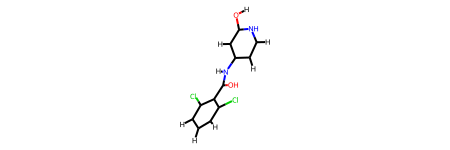

In [81]:
from Datahandler import hdf5_storage
import rdkit
import mdtraj
import nglview

storage = hdf5_storage('/tmp/Additional_elements_999.h5')
mcdict = storage.get_molids_and_confids()

tmpfile = "/tmp/test.pdb"

id = '0'
confid = 'conf_02'
traj = storage.get_trajectory(id, confid)
indices = traj.top.select('resid %i' % (traj.n_residues-1))

traj.save_pdb(tmpfile)
new_trajectory = mdtraj.load_pdb(tmpfile,atom_indices=indices).center_coordinates()
new_trajectory.save_pdb(tmpfile)
rdkit_mol = rdkit.Chem.MolFromPDBFile(tmpfile, removeHs=False, sanitize=False)
rdkit_mol

In [82]:
# Import Point3D
from rdkit.Chem import rdGeometry
from rdkit.Chem import rdMolTransforms
from rdkit.Chem import rdDistGeom
from rdkit.Chem import AllChem
from rdkit.Geometry import Point3D


In [84]:
storage.get_smiles(id) == rdkit.Chem.CanonSmiles(storage.get_smiles(id))

False

In [71]:
traj.xyz[0,0]

array([1.4353833, 2.6894414, 1.9270004], dtype=float32)

In [132]:
id = '0'
confid = 'conf_02'
traj = storage.get_trajectory(id, confid)
indices = traj.top.select('resid %i' % (traj.n_residues-1))
mol = Chem.MolFromSmiles(storage.get_smiles(id))
smiles = Chem.MolToSmiles(mol)
mol = Chem.MolFromSmiles(smiles)


indices = traj.top.select('resid %i' % (traj.n_residues-1))
traj.save_pdb(tmpfile)
new_trajectory = mdtraj.load_pdb(tmpfile,atom_indices=indices).center_coordinates()
new_trajectory.save_pdb(tmpfile)
rdkit_mol = rdkit.Chem.MolFromPDBFile(tmpfile, removeHs=False)
newMol = AllChem.AssignBondOrdersFromTemplate(mol, rdkit_mol)


# mol = rdkit.Chem.AddHs(mol)
# rdkit.Chem.AllChem.EmbedMolecule(mol)

# conf = mol.GetConformer(0)
# for i in range(len(indices)):
#     x,y,z = traj.xyz[0][indices[i],:]*10
#     conf.SetAtomPosition(i, Point3D(float(x),float(y),float(z)))

# for bond in mol.GetBonds():
#     assert rdMolTransforms.GetBondLength(conf, bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) < 2.5

[16:15:46] WARNING: More than one matching pattern found - picking one



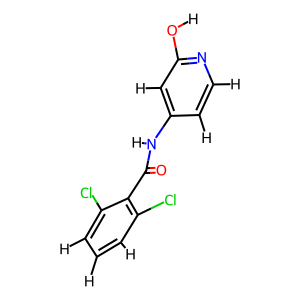

In [135]:
rdkit.IPythonConsole.Draw.MolToImage(newMol)

In [92]:
from rdkit.Chem import rdMolTransforms

In [96]:
for bond in mol.GetBonds():
    assert rdMolTransforms.GetBondLength(conf, bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) < 2.0

1.3649234382362994

In [131]:
for bond in mol.GetBonds():
    print(bond.GetBondType())

SINGLE
AROMATIC
AROMATIC
AROMATIC
AROMATIC
SINGLE
SINGLE
DOUBLE
SINGLE
AROMATIC
SINGLE
AROMATIC
AROMATIC
AROMATIC
AROMATIC
SINGLE
AROMATIC
AROMATIC
AROMATIC
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE


In [90]:
rdkit.Chem.Draw.IPythonConsole.drawMol3D(mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [36]:
Chem.MolToSmiles(rdkit_mol)

'[H]OC([H])([H])C1([H])SC([H])(N2C([H])C(C([H])C([H])[H])C(O)N([H])C2O)C([H])([H])C1([H])O[H]'

In [32]:
Chem.MolToCXSmiles(rdkit_mol)

'[H]OC([H])([H])C1([H])SC([H])(N2C([H])C(C([H])C([H])[H])C(O)N([H])C2O)C([H])([H])C1([H])O[H] |(2.366,-0.743,-1.662;2.952,-1.455,-1.969;2.283,-2.727,-1.973;2.019,-3.004,-2.998;2.985,-3.524,-1.714;1.127,-2.628,-1.002;0.819,-3.589,-0.581;1.615,-1.726,0.445;-0.064,-0.938,0.602;-0.388,-1.152,1.625;0.006,0.534,0.557;-0.815,1.17,1.513;-1.313,0.584,2.279;-0.792,2.533,1.542;-1.677,3.331,2.481;-1.813,4.404,2.399;-2.46,2.772,3.436;-2.975,3.377,4.176;-2.503,1.701,3.605;0.078,3.305,0.592;0.185,4.503,0.554;0.709,2.554,-0.408;1.364,3.073,-0.991;0.643,1.221,-0.46;1.17,0.783,-1.412;-1.017,-1.535,-0.412;-1.49,-2.418,0.029;-1.774,-0.796,-0.689;-0.181,-2.077,-1.605;0.067,-1.21,-2.224;-0.844,-3.025,-2.498;-0.285,-3.29,-3.248)|'

In [30]:
Chem.MolFromCXSmiles("CC|(0,0,0,1,1,1)")

AttributeError: module 'rdkit.Chem' has no attribute 'MolFromCXSmiles'

In [20]:
from rdkit import Chem

In [27]:
tmpfile

'/tmp/test.pdb'

In [25]:
traj.save_xyz(tmpfile)
rdkit_mol = Chem.MolFromXYZFile(tmpfile)

[15:11:23] 

****
Post-condition Violation
Element 'CL1' not found
Violation occurred on line 93 in file /home/conda/feedstock_root/build_artifacts/rdkit_1692275722171/work/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[15:11:23] Element 'CL1' not found


In [26]:
rdkit.Chem.Draw.IPythonConsole.drawMol3D(rdkit_mol)

AttributeError: 'NoneType' object has no attribute 'GetNumAtoms'

In [11]:
nglview.show_rdkit(rdkit_mol)

NGLWidget()

In [81]:
storage = hdf5_storage('/tmp/ClC(Cl)Cl_small_molecules_n_50_id_89_seed_161311.hdf5')
mcdict = storage.get_molids_and_confids()

In [86]:
mcdict

{'0': ['0'],
 '1': ['0'],
 '10': ['0'],
 '11': ['0'],
 '12': ['0'],
 '13': ['0'],
 '14': ['0'],
 '15': ['0'],
 '16': ['0'],
 '17': ['0'],
 '18': ['0'],
 '19': ['0'],
 '2': ['0'],
 '20': ['0'],
 '21': ['0'],
 '22': ['0'],
 '23': ['0'],
 '24': ['0'],
 '25': ['0'],
 '26': ['0'],
 '27': ['0'],
 '28': ['0'],
 '29': ['0'],
 '3': ['0'],
 '30': ['0'],
 '31': ['0'],
 '32': ['0'],
 '33': ['0'],
 '34': ['0'],
 '35': ['0'],
 '36': ['0'],
 '37': ['0'],
 '38': ['0'],
 '39': ['0'],
 '4': ['0'],
 '40': ['0'],
 '41': ['0'],
 '42': ['0'],
 '43': ['0'],
 '44': ['0'],
 '45': ['0'],
 '46': ['0'],
 '47': ['0'],
 '48': ['0'],
 '49': ['0'],
 '5': ['0'],
 '6': ['0'],
 '7': ['0'],
 '8': ['0'],
 '9': ['0']}

In [82]:
import io

In [83]:
tmpfile = "/tmp/test.pdb"

In [87]:
id = '3'
confid = '0'
traj = storage.get_trajectory(id, confid)
indices = traj.top.select('resid %i' % (traj.n_residues-1))

traj.save_pdb(tmpfile)
new_trajectory = mdtraj.load_pdb(tmpfile,atom_indices=indices).center_coordinates()
new_trajectory.save_pdb(tmpfile)
rdkit_mol = rdkit.Chem.MolFromPDBFile(tmpfile, removeHs=False)

END


In [88]:
rdkit_mol.GetNumConformers()

25

In [89]:
nglview.show_rdkit(rdkit_mol)

NGLWidget()

array([2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434,
       2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445,
       2446, 2447, 2448, 2449])

In [54]:
traj.xyz

array([[[ 0.91573834,  0.9327925 ,  2.4541643 ],
        [ 0.9193263 ,  0.8780598 ,  2.5326097 ],
        [ 0.822336  ,  0.953441  ,  2.4507055 ],
        ...,
        [ 2.5160944 ,  1.9260145 ,  1.9801213 ],
        [ 2.415574  ,  2.0565596 ,  2.177512  ],
        [ 2.723849  ,  2.7080648 ,  1.9382894 ]],

       [[ 0.84111285,  1.2054324 ,  2.3318088 ],
        [ 0.8212699 ,  1.1564621 ,  2.4116242 ],
        [ 0.75094944,  1.22086   ,  2.3036153 ],
        ...,
        [ 2.474987  ,  2.0432248 ,  1.6817634 ],
        [ 2.391162  ,  2.2326987 ,  1.8125645 ],
        [ 2.7956793 ,  2.758197  ,  1.5749756 ]],

       [[ 0.9850107 ,  0.7647221 ,  2.3648415 ],
        [ 0.9180021 ,  0.7849637 ,  2.2995546 ],
        [ 0.954788  ,  0.6818979 ,  2.4021115 ],
        ...,
        [ 2.4734087 ,  2.1087291 ,  1.6459508 ],
        [ 2.5086462 ,  2.2584472 ,  1.4555689 ],
        [ 2.8486695 ,  2.7545671 ,  1.4287969 ]],

       ...,

       [[ 0.42651668,  1.118562  ,  1.0661521 ],
        [ 0

In [55]:
indices = traj.top.select('resid %i' % (traj.n_residues-1))
new_trajectory = mdtraj.Trajectory(traj.xyz[:,indices],topology=traj.top.subset(indices))

In [51]:
rdkit_mol.GetNumConformers()

25

array([2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434,
       2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445,
       2446, 2447, 2448, 2449])

In [38]:
traj.n_atoms

2450

In [34]:
molecular_traj = traj.atom_slice()

<mdtraj.Topology with 1 chains, 1 residues, 26 atoms, 27 bonds at 0x7587b0604d00>

In [36]:
molecular_traj.save_pdb('/tmp/molecular_traj.pdb')
rdkit_mol = rdkit.Chem.MolFromPDBFile('/tmp/molecular_traj.pdb')

TypeError: not all arguments converted during string formatting

In [33]:
import nglview
nglview.show_mdtraj(molecular_traj[0])

TypeError: not all arguments converted during string formatting

In [14]:
mdtraj.select('chain 808')

AttributeError: module 'mdtraj' has no attribute 'select'

In [11]:
traj.select('chain ==809')

AttributeError: 'Trajectory' object has no attribute 'select'

In [2]:
import lwreg
from lwreg.utils import standardization_lib
from rdkit import Chem
import numpy as np
import sys
sys.path.append("..")

from Data.Datahandler import hdf5_storage
from rdkit.Geometry import Point3D

import os

In [3]:
with open("/cluster/home/kpaul/.lwreg_key","r") as f:
    key = f.read().strip()

config = lwreg.utils.defaultConfig()
config["standardization"] = standardization_lib.NoStandardization()
config["dbname"] = "solvent_forces"
config["dbtype"] = "postgresql"
config["removeHs"] = 0
config["registerConformers"] = True
config["hashConformer"] = 0 # set to 0
config["numConformerDigits"] = 3 # Question: what is this?
config["host"] = "scotland"
config["user"] = "kpaul_lwreg"
config["password"] = key

# Deposit in Database

In [14]:
%load_ext sql
psql_connection_string = f"postgresql://{config['user']}:{config['password']}@{config['host']}/{config['dbname']}"
d = %sql $psql_connection_string \
SELECT origin from solvent_CCl3.explicit_calculations;

data = d.DataFrame()
allready_deposited = set([str(d) for d in data.origin.unique()])

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
1028181 rows affected.


In [5]:
def reset_db():
    cn = lwreg.utils._connect(config) # Connection to the database
    curs = cn.cursor() # Command line cursor in postgresql
    #curs.execute("drop table if exists solvent_CCl3.explicit_calculations") # execute the command
    #curs.execute("drop schema if exists solvent_CCl3") # execute the command
    curs.execute("create schema if not exists solvent_CCl3") # execute the command
    curs.execute("create table if not exists solvent_CCl3.explicit_calculations (conf_id int primary key, positions float[][] not null, forces float[][] not null, atomfeatures float[][] not null, trajectory text, origin text, usage_flag text not null)") # execute the command
    cn.commit() # commit the command

def arr_to_string(arr):
    arraystring = np.array2string(arr,separator=',')
    arraystring = arraystring.replace('[','{')
    arraystring = arraystring.replace(']','}')
    return arraystring

def deposit_file(file,usage_flag="train",allready_deposited=[]):
    deposited_entries = 0

    if file.split('/')[-1] in allready_deposited:
        return -1


    if not os.path.isfile(file):
        print('file does not exist')
        return -1

    storage = hdf5_storage(file)
    try:
        mcdict = storage.get_molids_and_confids()
    except:
        return -1

    cn = lwreg.utils._connect(config) # Connection to the database
    curs = cn.cursor() # Command line cursor in postgresql
    deposit_mols = []

    for key in mcdict.keys():
        try:
            confid = mcdict[key][0]
            smiles = storage.get_smiles(key)
        except Exception as e:
            print(e)
            continue
        try:
            force, pos, frame = storage.get_reextraction(key,confid,True)
            atomfeatures = storage.get_repocessed_atom_features_and_unique_radii(key,confid)
            atfeat = atomfeatures[0]
        except Exception as e:
            print(e)
            continue
        
        try:
            mol = Chem.MolFromSmiles(smiles)
            mol = Chem.AddHs(mol)
            Chem.AllChem.EmbedMolecule(mol)
            conf = mol.GetConformer()
        except Exception as e:
            print(e)
            continue
        
        for k in range(3):
            try:
                for i in range(mol.GetNumAtoms()):
                    x,y,z = pos[k][i]
                    conf.SetAtomPosition(i,Point3D(x,y,z))
            except Exception as e:
                print(e)
                continue
            try:
                entry_file = file.split('/')[-1]
                #print(entry_file)
                entry_molregno_confid = lwreg.register(config,mol,fail_on_duplicate=True,no_verbose=True)
                curs.execute("insert into solvent_CCl3.explicit_calculations (conf_id, positions, forces, atomfeatures, trajectory, origin, usage_flag) values (%s, %s, %s, %s, %s, %s, %s)", (entry_molregno_confid[1], arr_to_string(pos[k]),arr_to_string(force[k]),arr_to_string(atfeat), None, entry_file, usage_flag))
                deposited_entries += 1
            except Exception as e:
                #print(k)
                #print(e)
                continue
    if '100.h5' in file:
        print(file,deposited_entries)
    cn.commit()
    return deposited_entries

def deposit_test_files(file,allready_deposited=[]):
    deposit_file(file,usage_flag="test",allready_deposited=[])

In [6]:
import tqdm

In [7]:
from multiprocessing import Pool

In [11]:
files = ['/cluster/work/igc/kpaul/projects/small_molecule_multisolvent/Simulation/Calculated_data/ClC(Cl)Cl_small_molecules_n_50_id_%i_seed_161311.hdf5' % (i) for i in range(7000)]
files = [file for file in files if not file.split('/')[-1] in allready_deposited]

In [13]:
pool = Pool(30)
%time returns = pool.map(deposit_file,files)

[10:56:04] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:56:05] UFFTYPER: Unrecognized charge state for atom: 11
[10:56:05] UFFTYPER: Unrecognized charge state for atom: 16
[10:56:05] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:56:06] UFFTYPER: Unrecognized charge state for atom: 14
[10:56:09] UFFTYPER: Unrecognized charge state for atom: 1
[10:56:10] UFFTYPER: Unrecognized charge state for atom: 9
[10:56:10] UFFTYPER: Unrecognized charge state for atom: 17
[10:56:11] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[10:56:11] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[10:56:11] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[10:56:11] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[10:56:11] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[10:56:11] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[10:56:11] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[10:56:11] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedra

"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:56:13] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:56:14] UFFTYPER: Unrecognized charge state for atom: 10
[10:56:14] UFFTYPER: Unrecognized charge state for atom: 5
[10:56:14] UFFTYPER: Unrecognized charge state for atom: 9
[10:56:14] UFFTYPER: Unrecognized charge state for atom: 2
[10:56:14] UFFTYPER: Unrecognized charge state for atom: 11
[10:56:14] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:56:19] UFFTYPER: Unrecognized charge state for atom: 9
[10:56:20] UFFTYPER: Unrecognized charge state for atom: 20
[10:56:20] UFFTYPER: Unrecognized charge state for atom: 12
[10:56:21] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:56:25] UFFTYPER: Unrecognized charge state for atom: 4
[10:56:26] UFFTYPER: Unrecognized charge state for atom: 4
[10:56:30] UFFTYPER: Unrecognized charge state for atom: 1
[10:56:31] UFFTYPER: Unrecognized charge state for atom: 10
[10:56:34] UFFTYPER: Unrecognized charge state for atom: 10
[10:56:35] UFFTYPER: Unrecognized charge state for atom: 12
[10:56:36] UFFTYPER: Unrecognized charge state for atom: 5
[10:56:36] UFFTYPER: Unrecognized charge state for atom: 8
[10:56:36] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:56:38] UFFTYPER: Unrecognized charge state for atom: 10
[10:56:39] UFFTYPER: Unrecognized charge state for atom: 6
[10:56:40] UFFTYPER: Unrecognized charge state for atom: 1
[10:56:40] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:56:42] UFFTYPER: Unrecognized charge state for atom: 8


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:56:43] UFFTYPER: Unrecognized charge state for atom: 21
[10:56:43] UFFTYPER: Unrecognized charge state for atom: 19


"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:56:48] UFFTYPER: Unrecognized charge state for atom: 16
[10:56:48] UFFTYPER: Unrecognized charge state for atom: 10
[10:56:51] UFFTYPER: Unrecognized charge state for atom: 6
[10:56:52] UFFTYPER: Unrecognized charge state for atom: 19
[10:56:54] UFFTYPER: Unrecognized charge state for atom: 10
[10:56:55] UFFTYPER: Unrecognized charge state for atom: 7
[10:56:56] UFFTYPER: Unrecognized charge state for atom: 9
[10:56:57] UFFTYPER: Unrecognized charge state for atom: 8


"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:56:59] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[10:57:00] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[10:57:05] UFFTYPER: Unrecognized charge state for atom: 8
[10:57:06] UFFTYPER: Unrecognized charge state for atom: 3
[10:57:06] UFFTYPER: Unrecognized charge state for atom: 17
[10:57:12] UFFTYPER: Unrecognized charge state for atom: 1
[10:57:12] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:57:15] UFFTYPER: Unrecognized charge state for atom: 5
[10:57:17] UFFTYPER: Unrecognized charge state for atom: 15
[10:57:17] UFFTYPER: Unrecognized charge state for atom: 1
[10:57:21] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:57:23] UFFTYPER: Unrecognized charge state for atom: 9
[10:57:24] UFFTYPER: Unrecognized charge state for atom: 15
[10:57:24] UFFTYPER: Unrecognized charge state for atom: 20
[10:57:25] UFFTYPER: Unrecognized charge state for atom: 6
[10:57:25] UFFTYPER: Warning: hybridization set to SP3 for atom 2
[10:57:26] UFFTYPER: Unrecognized charge state for atom: 19


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[10:57:27] UFFTYPER: Unrecognized charge state for atom: 20


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:57:29] UFFTYPER: Unrecognized charge state for atom: 9
[10:57:30] UFFTYPER: Unrecognized charge state for atom: 13
[10:57:34] UFFTYPER: Unrecognized charge state for atom: 8
[10:57:41] UFFTYPER: Unrecognized charge state for atom: 8
[10:57:41] UFFTYPER: Unrecognized charge state for atom: 16
[10:57:41] UFFTYPER: Unrecognized charge state for atom: 11
[10:57:41] UFFTYPER: Unrecognized charge state for atom: 5
[10:57:44] UFFTYPER: Unrecognized charge state for atom: 6
[10:57:45] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:57:45] UFFTYPER: Unrecognized charge state for atom: 3


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:57:46] UFFTYPER: Unrecognized charge state for atom: 7
[10:57:46] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[10:57:47] UFFTYPER: Unrecognized charge state for atom: 5
[10:57:50] UFFTYPER: Unrecognized charge state for atom: 5
[10:57:51] UFFTYPER: Unrecognized charge state for atom: 7
[10:57:52] UFFTYPER: Unrecognized charge state for atom: 9
[10:57:52] UFFTYPER: Unrecognized charge state for atom: 1
[10:57:53] UFFTYPER: Unrecognized charge state for atom: 12
[10:57:53] UFFTYPER: Unrecognized charge state for atom: 9
[10:57:57] UFFTYPER: Unrecognized charge state for atom: 6
[10:57:57] UFFTYPER: Unrecognized charge state for atom: 10
[10:57:58] UFFTYPER: Unrecognized charge state for atom: 10
[10:57:59] UFFTYPER: Unrecognized charge state for atom: 3
[10:57:59] UFFTYPER: Unrecognized charge state for atom: 10
[10:57:59] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:58:00] UFFTYPER: Unrecognized charge state for atom: 2
[10:58:03] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:58:07] UFFTYPER: Unrecognized charge state for atom: 8
[10:58:08] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[10:58:17] UFFTYPER: Unrecognized charge state for atom: 15


"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:58:20] UFFTYPER: Unrecognized charge state for atom: 5
[10:58:22] UFFTYPER: Unrecognized charge state for atom: 12
[10:58:22] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:58:30] UFFTYPER: Unrecognized charge state for atom: 3
[10:58:30] UFFTYPER: Unrecognized charge state for atom: 1
[10:58:31] UFFTYPER: Unrecognized charge state for atom: 20
[10:58:31] UFFTYPER: Unrecognized charge state for atom: 5
[10:58:31] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:58:32] UFFTYPER: Unrecognized charge state for atom: 8


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:58:33] UFFTYPER: Unrecognized charge state for atom: 15
[10:58:33] UFFTYPER: Unrecognized charge state for atom: 1
[10:58:36] UFFTYPER: Unrecognized charge state for atom: 3
[10:58:36] UFFTYPER: Unrecognized charge state for atom: 1
[10:58:37] UFFTYPER: Unrecognized charge state for atom: 7
[10:58:37] UFFTYPER: Unrecognized charge state for atom: 20
[10:58:39] UFFTYPER: Unrecognized charge state for atom: 10
[10:58:40] UFFTYPER: Unrecognized charge state for atom: 5
[10:58:40] UFFTYPER: Unrecognized charge state for atom: 6
[10:58:42] UFFTYPER: Unrecognized charge state for atom: 1
[10:58:48] UFFTYPER: Unrecognized charge state for atom: 6
[10:58:50] UFFTYPER: Unrecognized charge state for atom: 3
[10:58:50] UFFTYPER: Unrecognized charge state for atom: 9
[10:58:50] UFFTYPER: Unrecognized charge state for atom: 8
[10:58:52] UFFTYPER: Unrecognized charge state for atom: 21


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:58:59] UFFTYPER: Unrecognized charge state for atom: 6
[10:59:00] UFFTYPER: Unrecognized charge state for atom: 4
[10:59:01] UFFTYPER: Unrecognized charge state for atom: 7
[10:59:01] UFFTYPER: Unrecognized charge state for atom: 4
[10:59:05] UFFTYPER: Unrecognized charge state for atom: 6
[10:59:07] UFFTYPER: Unrecognized charge state for atom: 1
[10:59:08] UFFTYPER: Unrecognized charge state for atom: 2
[10:59:10] UFFTYPER: Unrecognized charge state for atom: 4
[10:59:12] UFFTYPER: Unrecognized charge state for atom: 5
[10:59:14] UFFTYPER: Unrecognized charge state for atom: 13
[10:59:16] UFFTYPER: Unrecognized charge state for atom: 16


"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:59:20] UFFTYPER: Unrecognized charge state for atom: 9
[10:59:20] UFFTYPER: Unrecognized charge state for atom: 8


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[10:59:22] UFFTYPER: Unrecognized charge state for atom: 1
[10:59:23] UFFTYPER: Unrecognized charge state for atom: 4
[10:59:23] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:59:25] UFFTYPER: Unrecognized charge state for atom: 5
[10:59:27] UFFTYPER: Unrecognized charge state for atom: 4
[10:59:28] UFFTYPER: Unrecognized charge state for atom: 9
[10:59:29] UFFTYPER: Unrecognized charge state for atom: 19
[10:59:29] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:59:31] UFFTYPER: Unrecognized charge state for atom: 3
[10:59:31] UFFTYPER: Unrecognized charge state for atom: 2
[10:59:33] UFFTYPER: Unrecognized charge state for atom: 1
[10:59:35] UFFTYPER: Unrecognized charge state for atom: 1
[10:59:35] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:59:37] UFFTYPER: Unrecognized charge state for atom: 1
[10:59:38] UFFTYPER: Unrecognized charge state for atom: 10
[10:59:39] UFFTYPER: Unrecognized charge state for atom: 1
[10:59:41] UFFTYPER: Unrecognized charge state for atom: 2
[10:59:42] UFFTYPER: Unrecognized charge state for atom: 12
[10:59:43] UFFTYPER: Unrecognized charge state for atom: 7
[10:59:43] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:59:47] UFFTYPER: Unrecognized charge state for atom: 1
[10:59:49] UFFTYPER: Unrecognized charge state for atom: 8
[10:59:53] UFFTYPER: Unrecognized charge state for atom: 10
[10:59:53] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"


[10:59:54] UFFTYPER: Unrecognized charge state for atom: 3
[10:59:55] UFFTYPER: Unrecognized charge state for atom: 19
[10:59:59] UFFTYPER: Unrecognized charge state for atom: 4
[10:59:59] UFFTYPER: Unrecognized charge state for atom: 3
[11:00:00] UFFTYPER: Unrecognized charge state for atom: 10
[11:00:01] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:00:02] UFFTYPER: Unrecognized charge state for atom: 8
[11:00:03] UFFTYPER: Unrecognized charge state for atom: 1
[11:00:04] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:00:08] UFFTYPER: Unrecognized charge state for atom: 13
[11:00:08] UFFTYPER: Unrecognized charge state for atom: 1
[11:00:09] UFFTYPER: Unrecognized charge state for atom: 19


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:00:10] UFFTYPER: Unrecognized charge state for atom: 6
[11:00:12] UFFTYPER: Unrecognized charge state for atom: 7
[11:00:13] UFFTYPER: Unrecognized charge state for atom: 3
[11:00:15] UFFTYPER: Unrecognized charge state for atom: 9
[11:00:15] UFFTYPER: Unrecognized charge state for atom: 1
[11:00:17] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:00:19] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:00:19] UFFTYPER: Unrecognized charge state for atom: 17


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:00:31] UFFTYPER: Unrecognized charge state for atom: 19
[11:00:32] UFFTYPER: Unrecognized charge state for atom: 8
[11:00:33] UFFTYPER: Unrecognized charge state for atom: 10
[11:00:34] UFFTYPER: Unrecognized charge state for atom: 7
[11:00:35] UFFTYPER: Unrecognized charge state for atom: 7
[11:00:35] UFFTYPER: Unrecognized charge state for atom: 11


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:00:37] UFFTYPER: Unrecognized charge state for atom: 14


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:00:45] UFFTYPER: Unrecognized charge state for atom: 3


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:00:48] UFFTYPER: Unrecognized charge state for atom: 10
[11:00:49] UFFTYPER: Unrecognized charge state for atom: 1
[11:00:49] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:00:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:00:52] UFFTYPER: Unrecognized charge state for atom: 1
[11:00:52] UFFTYPER: Unrecognized charge state for atom: 15
[11:00:54] UFFTYPER: Unrecognized charge state for atom: 10
[11:00:56] UFFTYPER: Unrecognized charge state for atom: 13


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:00:56] UFFTYPER: Unrecognized charge state for atom: 8
[11:00:57] UFFTYPER: Unrecognized charge state for atom: 22
[11:00:58] UFFTYPER: Warning: hybridization set to SP3 for atom 3
[11:00:58] UFFTYPER: Unrecognized charge state for atom: 18
[11:00:59] UFFTYPER: Unrecognized charge state for atom: 2


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:01:05] UFFTYPER: Unrecognized charge state for atom: 5
[11:01:05] UFFTYPER: Unrecognized charge state for atom: 6
[11:01:06] UFFTYPER: Unrecognized charge state for atom: 16
[11:01:06] UFFTYPER: Unrecognized charge state for atom: 19
[11:01:08] UFFTYPER: Unrecognized charge state for atom: 15
[11:01:08] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[11:01:08] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[11:01:08] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[11:01:08] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[11:01:08] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[11:01:08] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[11:01:08] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[11:01:08] WARNING: not 

"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:01:17] UFFTYPER: Unrecognized charge state for atom: 17
[11:01:18] UFFTYPER: Unrecognized charge state for atom: 5
[11:01:19] UFFTYPER: Unrecognized charge state for atom: 4


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:01:23] UFFTYPER: Unrecognized charge state for atom: 2
[11:01:23] UFFTYPER: Unrecognized charge state for atom: 13
[11:01:24] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:01:27] UFFTYPER: Unrecognized charge state for atom: 1
[11:01:27] UFFTYPER: Unrecognized charge state for atom: 5
[11:01:28] UFFTYPER: Unrecognized charge state for atom: 5
[11:01:29] UFFTYPER: Unrecognized charge state for atom: 11
[11:01:29] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:01:33] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:01:38] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:01:41] UFFTYPER: Unrecognized charge state for atom: 4
[11:01:43] UFFTYPER: Unrecognized charge state for atom: 8


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:01:46] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:01:48] UFFTYPER: Unrecognized charge state for atom: 9
[11:01:48] UFFTYPER: Unrecognized charge state for atom: 16
[11:01:49] UFFTYPER: Unrecognized charge state for atom: 8
[11:01:50] UFFTYPER: Unrecognized charge state for atom: 7
[11:01:50] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:01:55] UFFTYPER: Unrecognized charge state for atom: 2
[11:01:55] UFFTYPER: Unrecognized charge state for atom: 11
[11:01:59] UFFTYPER: Unrecognized charge state for atom: 1
[11:01:59] UFFTYPER: Unrecognized charge state for atom: 12


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:02:10] UFFTYPER: Unrecognized charge state for atom: 17


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:02:10] UFFTYPER: Unrecognized charge state for atom: 9
[11:02:11] UFFTYPER: Unrecognized charge state for atom: 3
[11:02:12] UFFTYPER: Unrecognized charge state for atom: 1
[11:02:12] UFFTYPER: Unrecognized charge state for atom: 11
[11:02:13] UFFTYPER: Unrecognized charge state for atom: 13
[11:02:15] UFFTYPER: Unrecognized charge state for atom: 7
[11:02:16] UFFTYPER: Unrecognized charge state for atom: 9
[11:02:17] UFFTYPER: Unrecognized charge state for atom: 14


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:02:21] UFFTYPER: Unrecognized charge state for atom: 7
[11:02:23] UFFTYPER: Unrecognized charge state for atom: 1
[11:02:23] UFFTYPER: Unrecognized charge state for atom: 6
[11:02:24] UFFTYPER: Unrecognized charge state for atom: 4
[11:02:24] UFFTYPER: Unrecognized charge state for atom: 3
[11:02:26] UFFTYPER: Unrecognized charge state for atom: 9
[11:02:27] UFFTYPER: Unrecognized charge state for atom: 17


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:02:29] UFFTYPER: Unrecognized charge state for atom: 16
[11:02:29] UFFTYPER: Unrecognized charge state for atom: 1
[11:02:31] UFFTYPER: Unrecognized charge state for atom: 15
[11:02:32] UFFTYPER: Unrecognized charge state for atom: 11
[11:02:32] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:02:33] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:02:34] UFFTYPER: Unrecognized charge state for atom: 6
[11:02:35] UFFTYPER: Unrecognized charge state for atom: 2


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:02:37] UFFTYPER: Unrecognized charge state for atom: 4
[11:02:37] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:02:41] UFFTYPER: Unrecognized charge state for atom: 16


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:02:45] UFFTYPER: Unrecognized charge state for atom: 1
[11:02:45] UFFTYPER: Unrecognized charge state for atom: 11
[11:02:46] UFFTYPER: Unrecognized charge state for atom: 4
[11:02:46] UFFTYPER: Unrecognized charge state for atom: 7
[11:02:48] UFFTYPER: Unrecognized charge state for atom: 1
[11:02:50] UFFTYPER: Unrecognized charge state for atom: 10
[11:02:50] UFFTYPER: Unrecognized charge state for atom: 10
[11:02:52] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:02:53] UFFTYPER: Unrecognized charge state for atom: 4


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:02:58] UFFTYPER: Unrecognized charge state for atom: 1
[11:02:58] UFFTYPER: Unrecognized charge state for atom: 8
[11:02:59] UFFTYPER: Unrecognized charge state for atom: 18
[11:02:59] UFFTYPER: Unrecognized charge state for atom: 18
[11:03:01] UFFTYPER: Unrecognized charge state for atom: 13


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:03:01] UFFTYPER: Unrecognized charge state for atom: 19


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:03:02] UFFTYPER: Unrecognized charge state for atom: 8


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:03:04] UFFTYPER: Unrecognized charge state for atom: 14


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"

[11:03:04] UFFTYPER: Unrecognized charge state for atom: 1



"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:03:07] UFFTYPER: Unrecognized charge state for atom: 8
[11:03:09] UFFTYPER: Unrecognized charge state for atom: 4


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:03:12] UFFTYPER: Unrecognized charge state for atom: 14
[11:03:13] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:03:14] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:03:16] UFFTYPER: Unrecognized charge state for atom: 15
[11:03:16] UFFTYPER: Unrecognized charge state for atom: 4
[11:03:16] UFFTYPER: Unrecognized charge state for atom: 1
[11:03:17] UFFTYPER: Unrecognized charge state for atom: 14
[11:03:21] UFFTYPER: Unrecognized charge state for atom: 7
[11:03:21] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:03:26] UFFTYPER: Unrecognized charge state for atom: 12


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:03:26] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:03:35] UFFTYPER: Unrecognized charge state for atom: 13
[11:03:37] UFFTYPER: Unrecognized charge state for atom: 16


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:03:40] UFFTYPER: Unrecognized charge state for atom: 7
[11:03:41] UFFTYPER: Unrecognized charge state for atom: 1
[11:03:42] UFFTYPER: Unrecognized charge state for atom: 8
[11:03:42] UFFTYPER: Unrecognized charge state for atom: 14
[11:03:42] UFFTYPER: Unrecognized charge state for atom: 10
[11:03:48] UFFTYPER: Unrecognized charge state for atom: 17
[11:03:48] UFFTYPER: Unrecognized charge state for atom: 10
[11:03:49] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:03:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:03:52] UFFTYPER: Unrecognized charge state for atom: 1
[11:03:53] UFFTYPER: Unrecognized charge state for atom: 16
[11:03:53] UFFTYPER: Unrecognized charge state for atom: 6
[11:03:54] UFFTYPER: Unrecognized charge state for atom: 6
[11:03:54] UFFTYPER: Unrecognized charge state for atom: 7
[11:03:55] UFFTYPER: Unrecognized charge state for atom: 1
[11:03:55] UFFTYPER: Unrecognized charge state for atom: 10
[11:03:55] UFFTYPER: Unrecognized charge state for atom: 1
[11:03:56] UFFTYPER: Unrecognized charge state for atom: 3
[11:04:01] UFFTYPER: Unrecognized charge state for atom: 21
[11:04:03] UFFTYPER: Unrecognized charge state for atom: 8
[11:04:06] UFFTYPER: Unrecognized charge state for atom: 10
[11:04:07] UFFTYPER: Unrecognized charge state for atom: 1
[11:04:07] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:04:08] UFFTYPER: Unrecognized charge state for atom: 4


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:04:11] UFFTYPER: Unrecognized charge state for atom: 5
[11:04:19] UFFTYPER: Unrecognized charge state for atom: 1
[11:04:20] UFFTYPER: Unrecognized charge state for atom: 15
[11:04:20] UFFTYPER: Unrecognized charge state for atom: 15
[11:04:21] UFFTYPER: Unrecognized charge state for atom: 3
[11:04:24] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:04:24] UFFTYPER: Unrecognized charge state for atom: 3
[11:04:25] UFFTYPER: Unrecognized charge state for atom: 12
[11:04:27] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:04:30] UFFTYPER: Unrecognized charge state for atom: 6
[11:04:33] UFFTYPER: Unrecognized charge state for atom: 1
[11:04:33] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:04:35] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:04:44] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:04:49] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:04:49] UFFTYPER: Unrecognized charge state for atom: 14
[11:04:50] UFFTYPER: Unrecognized charge state for atom: 15
[11:04:54] UFFTYPER: Unrecognized charge state for atom: 17
[11:04:57] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:05:00] UFFTYPER: Unrecognized charge state for atom: 4
[11:05:02] UFFTYPER: Unrecognized charge state for atom: 11
[11:05:02] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:05:10] UFFTYPER: Unrecognized charge state for atom: 5
[11:05:10] UFFTYPER: Unrecognized charge state for atom: 1
[11:05:10] UFFTYPER: Unrecognized charge state for atom: 8
[11:05:13] UFFTYPER: Unrecognized charge state for atom: 7
[11:05:15] UFFTYPER: Unrecognized charge state for atom: 17
[11:05:15] UFFTYPER: Unrecognized charge state for atom: 1
[11:05:17] UFFTYPER: Unrecognized charge state for atom: 7
[11:05:17] UFFTYPER: Unrecognized charge state for atom: 8
[11:05:19] UFFTYPER: Unrecognized charge state for atom: 1
[11:05:19] UFFTYPER: Unrecognized charge state for atom: 9
[11:05:19] UFFTYPER: Unrecognized charge state for atom: 9
[11:05:20] UFFTYPER: Unrecognized charge state for atom: 8
[11:05:23] UFFTYPER: Unrecognized charge state for atom: 15
[11:05:23] UFFTYPER: Unrecognized charge state for atom: 12
[11:05:25] UFFTYPER: Unrecognized charge state for atom: 11
[11:05:26] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:05:27] UFFTYPER: Unrecognized charge state for atom: 4
[11:05:28] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:05:35] UFFTYPER: Unrecognized charge state for atom: 1
[11:05:38] UFFTYPER: Unrecognized charge state for atom: 12
[11:05:39] UFFTYPER: Unrecognized charge state for atom: 9
[11:05:40] UFFTYPER: Unrecognized charge state for atom: 1
[11:05:40] UFFTYPER: Unrecognized charge state for atom: 8
[11:05:44] UFFTYPER: Unrecognized charge state for atom: 21
[11:05:45] UFFTYPER: Unrecognized charge state for atom: 10
[11:05:46] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:05:56] UFFTYPER: Unrecognized charge state for atom: 10
[11:05:58] UFFTYPER: Unrecognized charge state for atom: 8
[11:06:06] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:06:13] UFFTYPER: Unrecognized charge state for atom: 4
[11:06:15] UFFTYPER: Unrecognized charge state for atom: 9
[11:06:15] UFFTYPER: Unrecognized charge state for atom: 17
[11:06:16] UFFTYPER: Unrecognized charge state for atom: 1
[11:06:19] UFFTYPER: Unrecognized charge state for atom: 10
[11:06:21] UFFTYPER: Unrecognized charge state for atom: 6
[11:06:22] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:06:28] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:06:35] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:06:40] UFFTYPER: Unrecognized charge state for atom: 10
[11:06:41] UFFTYPER: Unrecognized charge state for atom: 12
[11:06:42] UFFTYPER: Unrecognized charge state for atom: 4
[11:06:44] UFFTYPER: Unrecognized charge state for atom: 9
[11:06:44] UFFTYPER: Unrecognized charge state for atom: 12
[11:06:45] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:06:48] UFFTYPER: Unrecognized charge state for atom: 12


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:06:49] UFFTYPER: Unrecognized charge state for atom: 1
[11:06:49] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:06:56] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:06:59] UFFTYPER: Unrecognized charge state for atom: 6
[11:07:01] UFFTYPER: Unrecognized charge state for atom: 1
[11:07:02] UFFTYPER: Unrecognized charge state for atom: 4
[11:07:03] UFFTYPER: Unrecognized charge state for atom: 7
[11:07:04] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:07:08] UFFTYPER: Unrecognized charge state for atom: 18
[11:07:09] UFFTYPER: Unrecognized charge state for atom: 14


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:07:10] UFFTYPER: Unrecognized charge state for atom: 9
[11:07:11] UFFTYPER: Unrecognized charge state for atom: 3


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:07:11] UFFTYPER: Unrecognized charge state for atom: 19
[11:07:13] UFFTYPER: Unrecognized charge state for atom: 13
[11:07:13] UFFTYPER: Unrecognized charge state for atom: 3
[11:07:18] UFFTYPER: Unrecognized charge state for atom: 2
[11:07:18] UFFTYPER: Unrecognized charge state for atom: 11
[11:07:19] UFFTYPER: Unrecognized charge state for atom: 14
[11:07:19] UFFTYPER: Unrecognized charge state for atom: 12
[11:07:20] UFFTYPER: Unrecognized charge state for atom: 13
[11:07:22] UFFTYPER: Unrecognized charge state for atom: 6
[11:07:22] UFFTYPER: Unrecognized charge state for atom: 2
[11:07:22] UFFTYPER: Unrecognized charge state for atom: 12
[11:07:26] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:07:27] UFFTYPER: Unrecognized charge state for atom: 18
[11:07:27] UFFTYPER: Unrecognized charge state for atom: 6
[11:07:28] UFFTYPER: Unrecognized charge state for atom: 4
[11:07:29] UFFTYPER: Unrecognized charge state for atom: 1
[11:07:31] UFFTYPER: Unrecognized charge state for atom: 1
[11:07:31] UFFTYPER: Unrecognized charge state for atom: 8


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:07:33] UFFTYPER: Unrecognized charge state for atom: 3


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:07:34] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:07:37] UFFTYPER: Unrecognized charge state for atom: 4


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:07:43] UFFTYPER: Unrecognized charge state for atom: 10
[11:07:43] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:07:46] UFFTYPER: Unrecognized charge state for atom: 8
[11:07:48] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:07:51] UFFTYPER: Unrecognized charge state for atom: 4
[11:07:58] UFFTYPER: Unrecognized charge state for atom: 8
[11:08:00] UFFTYPER: Unrecognized charge state for atom: 7
[11:08:01] UFFTYPER: Unrecognized charge state for atom: 14
[11:08:04] UFFTYPER: Unrecognized charge state for atom: 18


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:08:06] UFFTYPER: Unrecognized charge state for atom: 10
[11:08:07] UFFTYPER: Unrecognized charge state for atom: 12
[11:08:09] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:08:14] UFFTYPER: Unrecognized charge state for atom: 11
[11:08:15] UFFTYPER: Unrecognized charge state for atom: 9
[11:08:16] UFFTYPER: Unrecognized charge state for atom: 4


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:08:20] UFFTYPER: Unrecognized charge state for atom: 6
[11:08:22] UFFTYPER: Unrecognized charge state for atom: 9
[11:08:23] UFFTYPER: Unrecognized charge state for atom: 10
[11:08:24] UFFTYPER: Unrecognized charge state for atom: 8
[11:08:24] UFFTYPER: Unrecognized charge state for atom: 21
[11:08:24] UFFTYPER: Unrecognized charge state for atom: 1
[11:08:25] UFFTYPER: Unrecognized charge state for atom: 7
[11:08:26] UFFTYPER: Unrecognized charge state for atom: 12
[11:08:27] UFFTYPER: Unrecognized charge state for atom: 6
[11:08:28] UFFTYPER: Unrecognized charge state for atom: 6
[11:08:30] UFFTYPER: Unrecognized charge state for atom: 19
[11:08:31] UFFTYPER: Unrecognized charge state for atom: 9
[11:08:32] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:08:33] UFFTYPER: Unrecognized charge state for atom: 7
[11:08:33] UFFTYPER: Unrecognized charge state for atom: 15


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:08:34] UFFTYPER: Unrecognized charge state for atom: 9
[11:08:34] UFFTYPER: Unrecognized charge state for atom: 12


"Unable to open object (object 'extracted_forces' doesn't exist)""Unable to open object (object 'extracted_forces' doesn't exist)"

"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:08:36] UFFTYPER: Unrecognized charge state for atom: 8
[11:08:39] UFFTYPER: Unrecognized charge state for atom: 1
[11:08:40] UFFTYPER: Unrecognized charge state for atom: 12
[11:08:42] UFFTYPER: Unrecognized charge state for atom: 10
[11:08:42] UFFTYPER: Unrecognized charge state for atom: 1
[11:08:45] UFFTYPER: Unrecognized charge state for atom: 15


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:08:46] UFFTYPER: Unrecognized charge state for atom: 3


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:08:55] UFFTYPER: Unrecognized charge state for atom: 1
[11:08:55] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:08:57] UFFTYPER: Unrecognized charge state for atom: 4
[11:08:59] UFFTYPER: Unrecognized charge state for atom: 1
[11:09:03] UFFTYPER: Unrecognized charge state for atom: 10
[11:09:03] UFFTYPER: Unrecognized charge state for atom: 2
[11:09:04] UFFTYPER: Unrecognized charge state for atom: 3
[11:09:07] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:09:11] UFFTYPER: Unrecognized charge state for atom: 8
[11:09:14] UFFTYPER: Unrecognized charge state for atom: 8


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:09:17] UFFTYPER: Unrecognized charge state for atom: 14


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:09:18] UFFTYPER: Unrecognized charge state for atom: 15


Bad Conformer Id
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:09:20] UFFTYPER: Unrecognized charge state for atom: 1
[11:09:22] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:09:24] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:09:25] UFFTYPER: Unrecognized charge state for atom: 15
[11:09:26] UFFTYPER: Unrecognized charge state for atom: 7
[11:09:28] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:09:31] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:09:32] UFFTYPER: Unrecognized charge state for atom: 1
[11:09:35] UFFTYPER: Unrecognized charge state for atom: 19
[11:09:36] UFFTYPER: Unrecognized charge state for atom: 5
[11:09:38] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:09:39] UFFTYPER: Unrecognized charge state for atom: 1
[11:09:41] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:09:41] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:09:44] UFFTYPER: Unrecognized charge state for atom: 4
[11:09:45] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'reprocessed_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable 

[11:09:51] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:09:57] UFFTYPER: Unrecognized charge state for atom: 5
[11:09:57] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:09:59] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:10:00] UFFTYPER: Unrecognized charge state for atom: 3


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:10:08] UFFTYPER: Unrecognized charge state for atom: 3
[11:10:09] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:10:11] UFFTYPER: Unrecognized charge state for atom: 14
[11:10:11] UFFTYPER: Unrecognized charge state for atom: 19
[11:10:12] UFFTYPER: Unrecognized charge state for atom: 1
[11:10:12] UFFTYPER: Unrecognized charge state for atom: 1
[11:10:12] UFFTYPER: Unrecognized charge state for atom: 4
[11:10:14] UFFTYPER: Unrecognized charge state for atom: 9
[11:10:16] UFFTYPER: Unrecognized charge state for atom: 14
[11:10:17] UFFTYPER: Unrecognized charge state for atom: 12


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:10:18] UFFTYPER: Unrecognized charge state for atom: 10
[11:10:19] UFFTYPER: Unrecognized charge state for atom: 2


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:10:24] UFFTYPER: Unrecognized charge state for atom: 6
[11:10:24] UFFTYPER: Unrecognized charge state for atom: 8
[11:10:26] UFFTYPER: Unrecognized charge state for atom: 4
[11:10:27] UFFTYPER: Unrecognized charge state for atom: 1
[11:10:28] UFFTYPER: Unrecognized charge state for atom: 8
[11:10:30] UFFTYPER: Unrecognized charge state for atom: 13
[11:10:30] UFFTYPER: Unrecognized charge state for atom: 3
[11:10:31] UFFTYPER: Unrecognized charge state for atom: 1
[11:10:36] UFFTYPER: Unrecognized charge state for atom: 11


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:10:40] UFFTYPER: Unrecognized charge state for atom: 1
[11:10:42] UFFTYPER: Unrecognized charge state for atom: 19
[11:10:43] UFFTYPER: Unrecognized charge state for atom: 16
[11:10:43] UFFTYPER: Unrecognized charge state for atom: 5
[11:10:44] UFFTYPER: Unrecognized charge state for atom: 3
[11:10:45] UFFTYPER: Unrecognized charge state for atom: 5
[11:10:46] UFFTYPER: Unrecognized charge state for atom: 7
[11:10:49] UFFTYPER: Unrecognized charge state for atom: 1
[11:10:50] UFFTYPER: Unrecognized charge state for atom: 3
[11:10:50] UFFTYPER: Unrecognized charge state for atom: 3


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:10:52] UFFTYPER: Unrecognized charge state for atom: 7
[11:10:53] UFFTYPER: Unrecognized charge state for atom: 8
[11:10:55] UFFTYPER: Unrecognized charge state for atom: 3


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:10:56] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:10:59] UFFTYPER: Unrecognized charge state for atom: 12


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:11:00] UFFTYPER: Unrecognized charge state for atom: 6
[11:11:02] UFFTYPER: Unrecognized charge state for atom: 1
[11:11:04] UFFTYPER: Unrecognized charge state for atom: 16
[11:11:07] UFFTYPER: Unrecognized charge state for atom: 9
[11:11:10] UFFTYPER: Unrecognized charge state for atom: 4
[11:11:12] UFFTYPER: Unrecognized charge state for atom: 17


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:11:15] UFFTYPER: Unrecognized charge state for atom: 11
[11:11:15] UFFTYPER: Unrecognized charge state for atom: 9
[11:11:16] UFFTYPER: Unrecognized charge state for atom: 10
[11:11:17] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:11:19] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:11:23] UFFTYPER: Unrecognized charge state for atom: 6
[11:11:24] UFFTYPER: Unrecognized charge state for atom: 15
[11:11:26] UFFTYPER: Unrecognized charge state for atom: 10
[11:11:27] UFFTYPER: Unrecognized charge state for atom: 18
[11:11:27] UFFTYPER: Unrecognized charge state for atom: 10
[11:11:28] UFFTYPER: Unrecognized charge state for atom: 1
[11:11:28] UFFTYPER: Unrecognized charge state for atom: 5
[11:11:28] UFFTYPER: Unrecognized charge state for atom: 12
[11:11:29] UFFTYPER: Unrecognized charge state for atom: 9
[11:11:30] UFFTYPER: Unrecognized charge state for atom: 14


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:11:31] UFFTYPER: Unrecognized charge state for atom: 3
[11:11:32] UFFTYPER: Unrecognized charge state for atom: 1
[11:11:34] UFFTYPER: Unrecognized charge state for atom: 1
[11:11:34] UFFTYPER: Unrecognized charge state for atom: 8
[11:11:36] UFFTYPER: Unrecognized charge state for atom: 11


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:11:37] UFFTYPER: Unrecognized charge state for atom: 21
[11:11:40] UFFTYPER: Unrecognized charge state for atom: 1
[11:11:40] UFFTYPER: Unrecognized charge state for atom: 19
[11:11:41] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:11:41] UFFTYPER: Unrecognized charge state for atom: 3


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:11:42] UFFTYPER: Unrecognized charge state for atom: 9
[11:11:46] UFFTYPER: Unrecognized charge state for atom: 13
[11:11:46] UFFTYPER: Unrecognized charge state for atom: 10
[11:11:47] UFFTYPER: Unrecognized charge state for atom: 1
[11:11:50] UFFTYPER: Unrecognized charge state for atom: 8


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:11:50] UFFTYPER: Unrecognized charge state for atom: 3


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:11:53] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:11:55] UFFTYPER: Unrecognized charge state for atom: 11
[11:11:56] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:12:01] UFFTYPER: Unrecognized charge state for atom: 1
[11:12:02] UFFTYPER: Unrecognized charge state for atom: 9
[11:12:03] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:12:05] UFFTYPER: Unrecognized charge state for atom: 12


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:12:06] UFFTYPER: Unrecognized charge state for atom: 8
[11:12:07] UFFTYPER: Unrecognized charge state for atom: 9
[11:12:09] UFFTYPER: Unrecognized charge state for atom: 4
[11:12:11] UFFTYPER: Unrecognized charge state for atom: 16
[11:12:14] UFFTYPER: Unrecognized charge state for atom: 5
[11:12:17] UFFTYPER: Unrecognized charge state for atom: 5
[11:12:17] UFFTYPER: Unrecognized charge state for atom: 11
[11:12:18] UFFTYPER: Unrecognized charge state for atom: 8


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:12:20] UFFTYPER: Unrecognized charge state for atom: 4
[11:12:21] UFFTYPER: Unrecognized charge state for atom: 4


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:12:24] UFFTYPER: Unrecognized charge state for atom: 1
[11:12:24] UFFTYPER: Unrecognized charge state for atom: 1
[11:12:25] UFFTYPER: Unrecognized charge state for atom: 1
[11:12:26] UFFTYPER: Unrecognized charge state for atom: 6
[11:12:26] UFFTYPER: Warning: hybridization set to SP3 for atom 3
[11:12:29] UFFTYPER: Unrecognized charge state for atom: 1
[11:12:29] UFFTYPER: Unrecognized charge state for atom: 15
[11:12:29] UFFTYPER: Unrecognized charge state for atom: 20
[11:12:30] UFFTYPER: Unrecognized charge state for atom: 1
[11:12:32] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:12:38] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:12:40] UFFTYPER: Unrecognized charge state for atom: 9
[11:12:40] UFFTYPER: Unrecognized charge state for atom: 7
[11:12:42] UFFTYPER: Unrecognized charge state for atom: 5
[11:12:44] UFFTYPER: Unrecognized charge state for atom: 15
[11:12:45] UFFTYPER: Unrecognized charge state for atom: 8
[11:12:45] UFFTYPER: Unrecognized charge state for atom: 18


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:12:47] UFFTYPER: Unrecognized charge state for atom: 6
[11:12:48] UFFTYPER: Unrecognized charge state for atom: 1
[11:12:50] UFFTYPER: Unrecognized charge state for atom: 18
[11:12:50] UFFTYPER: Unrecognized charge state for atom: 14
[11:12:51] UFFTYPER: Unrecognized charge state for atom: 7
[11:12:51] UFFTYPER: Unrecognized charge state for atom: 16


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:12:53] UFFTYPER: Unrecognized charge state for atom: 2


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:12:55] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:12:56] UFFTYPER: Unrecognized charge state for atom: 4


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:12:57] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:12:58] UFFTYPER: Unrecognized charge state for atom: 1
[11:12:59] UFFTYPER: Unrecognized charge state for atom: 1
[11:13:01] UFFTYPER: Unrecognized charge state for atom: 17
[11:13:02] UFFTYPER: Unrecognized charge state for atom: 4
[11:13:05] UFFTYPER: Unrecognized charge state for atom: 1
[11:13:05] UFFTYPER: Unrecognized charge state for atom: 9
[11:13:05] UFFTYPER: Unrecognized charge state for atom: 9
[11:13:07] UFFTYPER: Unrecognized charge state for atom: 1
[11:13:07] UFFTYPER: Unrecognized charge state for atom: 2


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:13:10] UFFTYPER: Unrecognized charge state for atom: 10
[11:13:11] UFFTYPER: Unrecognized charge state for atom: 6
[11:13:11] UFFTYPER: Unrecognized charge state for atom: 9
[11:13:12] UFFTYPER: Unrecognized charge state for atom: 1
[11:13:13] UFFTYPER: Unrecognized charge state for atom: 1
[11:13:15] UFFTYPER: Unrecognized charge state for atom: 21
[11:13:15] UFFTYPER: Unrecognized charge state for atom: 14
[11:13:18] UFFTYPER: Unrecognized charge state for atom: 8
[11:13:23] UFFTYPER: Unrecognized charge state for atom: 6
[11:13:23] UFFTYPER: Unrecognized charge state for atom: 10
[11:13:27] UFFTYPER: Unrecognized charge state for atom: 13
[11:13:29] UFFTYPER: Unrecognized charge state for atom: 6
[11:13:31] UFFTYPER: Unrecognized charge state for atom: 7
[11:13:32] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:13:37] UFFTYPER: Unrecognized charge state for atom: 15
[11:13:38] UFFTYPER: Unrecognized charge state for atom: 14
[11:13:38] UFFTYPER: Unrecognized charge state for atom: 11
[11:13:42] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:13:44] UFFTYPER: Unrecognized charge state for atom: 12
[11:13:46] UFFTYPER: Unrecognized charge state for atom: 4
[11:13:46] UFFTYPER: Unrecognized charge state for atom: 2


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:13:50] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:13:52] UFFTYPER: Unrecognized charge state for atom: 12


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:13:54] UFFTYPER: Unrecognized charge state for atom: 10
[11:13:54] UFFTYPER: Unrecognized charge state for atom: 6
[11:13:55] UFFTYPER: Unrecognized charge state for atom: 1
[11:13:56] UFFTYPER: Unrecognized charge state for atom: 10
[11:13:56] UFFTYPER: Unrecognized charge state for atom: 11
[11:14:00] UFFTYPER: Unrecognized charge state for atom: 15
[11:14:00] UFFTYPER: Unrecognized charge state for atom: 3


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:14:02] UFFTYPER: Unrecognized charge state for atom: 10
[11:14:04] UFFTYPER: Unrecognized charge state for atom: 11


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:14:05] UFFTYPER: Unrecognized charge state for atom: 1
[11:14:05] UFFTYPER: Unrecognized charge state for atom: 16


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:14:10] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:14:12] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:14:14] UFFTYPER: Unrecognized charge state for atom: 13


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:14:18] UFFTYPER: Unrecognized charge state for atom: 3


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:14:19] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:14:24] UFFTYPER: Unrecognized charge state for atom: 6
[11:14:28] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:14:32] UFFTYPER: Unrecognized charge state for atom: 3
[11:14:32] UFFTYPER: Unrecognized charge state for atom: 10
[11:14:33] UFFTYPER: Unrecognized charge state for atom: 7
[11:14:34] UFFTYPER: Unrecognized charge state for atom: 16
[11:14:34] UFFTYPER: Unrecognized charge state for atom: 14
[11:14:34] UFFTYPER: Unrecognized charge state for atom: 7
[11:14:37] UFFTYPER: Unrecognized charge state for atom: 4
[11:14:41] UFFTYPER: Unrecognized charge state for atom: 13


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:14:42] UFFTYPER: Unrecognized charge state for atom: 3


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:14:51] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:14:52] UFFTYPER: Unrecognized charge state for atom: 1
[11:14:53] UFFTYPER: Unrecognized charge state for atom: 14
[11:14:53] UFFTYPER: Unrecognized charge state for atom: 15
[11:14:54] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:14:54] UFFTYPER: Unrecognized charge state for atom: 16


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:15:01] UFFTYPER: Unrecognized charge state for atom: 3
[11:15:01] UFFTYPER: Unrecognized charge state for atom: 7
[11:15:02] UFFTYPER: Unrecognized charge state for atom: 15
[11:15:05] UFFTYPER: Unrecognized charge state for atom: 16
[11:15:06] UFFTYPER: Unrecognized charge state for atom: 4
[11:15:09] UFFTYPER: Unrecognized charge state for atom: 2
[11:15:11] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:15:15] UFFTYPER: Unrecognized charge state for atom: 14
[11:15:17] UFFTYPER: Unrecognized charge state for atom: 11
[11:15:19] UFFTYPER: Unrecognized charge state for atom: 8
[11:15:20] UFFTYPER: Unrecognized charge state for atom: 12
[11:15:21] UFFTYPER: Unrecognized charge state for atom: 14
[11:15:25] UFFTYPER: Unrecognized charge state for atom: 11
[11:15:25] UFFTYPER: Unrecognized charge state for atom: 4
[11:15:26] UFFTYPER: Unrecognized charge state for atom: 1
[11:15:27] UFFTYPER: Unrecognized charge state for atom: 5
[11:15:27] UFFTYPER: Unrecognized charge state for atom: 5
[11:15:27] UFFTYPER: Unrecognized charge state for atom: 1
[11:15:27] UFFTYPER: Unrecognized charge state for atom: 9
[11:15:28] UFFTYPER: Unrecognized charge state for atom: 4
[11:15:29] UFFTYPER: Unrecognized charge state for atom: 5
[11:15:30] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:15:33] UFFTYPER: Unrecognized charge state for atom: 8
[11:15:35] UFFTYPER: Unrecognized charge state for atom: 10
[11:15:36] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'reprocessed_forces' doesn't exist)"


[11:15:41] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"

[11:15:41] UFFTYPER: Unrecognized charge state for atom: 4



"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:15:42] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:15:43] UFFTYPER: Unrecognized charge state for atom: 9
[11:15:44] UFFTYPER: Unrecognized charge state for atom: 2
[11:15:44] UFFTYPER: Unrecognized charge state for atom: 17


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:15:55] UFFTYPER: Unrecognized charge state for atom: 1
[11:15:58] UFFTYPER: Unrecognized charge state for atom: 14


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:15:59] UFFTYPER: Unrecognized charge state for atom: 6
[11:16:02] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:16:02] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:16:07] UFFTYPER: Unrecognized charge state for atom: 1
[11:16:08] UFFTYPER: Unrecognized charge state for atom: 6
[11:16:10] UFFTYPER: Unrecognized charge state for atom: 16
[11:16:10] UFFTYPER: Unrecognized charge state for atom: 15
[11:16:10] UFFTYPER: Unrecognized charge state for atom: 20
[11:16:11] UFFTYPER: Unrecognized charge state for atom: 13
[11:16:12] UFFTYPER: Unrecognized charge state for atom: 4
[11:16:13] UFFTYPER: Unrecognized charge state for atom: 16
[11:16:16] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:16:18] UFFTYPER: Unrecognized charge state for atom: 4
[11:16:18] UFFTYPER: Unrecognized charge state for atom: 13
[11:16:20] UFFTYPER: Unrecognized charge state for atom: 17
[11:16:21] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:16:21] UFFTYPER: Unrecognized charge state for atom: 7
[11:16:21] UFFTYPER: Unrecognized charge state for atom: 4
[11:16:24] UFFTYPER: Unrecognized charge state for atom: 10
[11:16:25] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:16:26] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:16:28] UFFTYPER: Unrecognized charge state for atom: 4


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:16:29] UFFTYPER: Unrecognized charge state for atom: 8
[11:16:33] UFFTYPER: Unrecognized charge state for atom: 4
[11:16:34] UFFTYPER: Unrecognized charge state for atom: 1
[11:16:36] UFFTYPER: Unrecognized charge state for atom: 21
[11:16:36] UFFTYPER: Unrecognized charge state for atom: 8
[11:16:42] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:16:47] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:16:52] UFFTYPER: Unrecognized charge state for atom: 10
[11:16:53] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:17:01] UFFTYPER: Unrecognized charge state for atom: 19
[11:17:02] UFFTYPER: Unrecognized charge state for atom: 10
[11:17:02] UFFTYPER: Unrecognized charge state for atom: 16
[11:17:03] UFFTYPER: Unrecognized charge state for atom: 18
[11:17:04] UFFTYPER: Unrecognized charge state for atom: 8
[11:17:07] UFFTYPER: Unrecognized charge state for atom: 4
[11:17:07] UFFTYPER: Unrecognized charge state for atom: 11
[11:17:07] UFFTYPER: Unrecognized charge state for atom: 1
[11:17:07] UFFTYPER: Unrecognized charge state for atom: 16


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:17:08] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:17:15] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:17:24] UFFTYPER: Unrecognized charge state for atom: 9
[11:17:24] UFFTYPER: Unrecognized charge state for atom: 12
[11:17:25] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:17:26] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:17:27] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:17:30] UFFTYPER: Unrecognized charge state for atom: 5
[11:17:32] UFFTYPER: Unrecognized charge state for atom: 12
[11:17:33] UFFTYPER: Unrecognized charge state for atom: 15


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:17:46] UFFTYPER: Unrecognized charge state for atom: 1
[11:17:46] UFFTYPER: Unrecognized charge state for atom: 9
[11:17:49] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:17:52] UFFTYPER: Unrecognized charge state for atom: 12


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:17:59] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:18:03] UFFTYPER: Unrecognized charge state for atom: 4
[11:18:04] UFFTYPER: Unrecognized charge state for atom: 8
[11:18:09] UFFTYPER: Unrecognized charge state for atom: 14


"Unable to open object (object 'reprocessed_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:18:10] UFFTYPER: Unrecognized charge state for atom: 1
[11:18:10] UFFTYPER: Unrecognized charge state for atom: 3
[11:18:11] UFFTYPER: Unrecognized charge state for atom: 9
[11:18:11] UFFTYPER: Unrecognized charge state for atom: 14


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:18:18] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:18:20] UFFTYPER: Unrecognized charge state for atom: 15


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:18:33] UFFTYPER: Unrecognized charge state for atom: 14
[11:18:33] UFFTYPER: Unrecognized charge state for atom: 19
[11:18:34] UFFTYPER: Unrecognized charge state for atom: 3


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:18:36] UFFTYPER: Unrecognized charge state for atom: 13
[11:18:38] UFFTYPER: Unrecognized charge state for atom: 1
[11:18:38] UFFTYPER: Unrecognized charge state for atom: 9
[11:18:39] UFFTYPER: Unrecognized charge state for atom: 19


"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:18:44] UFFTYPER: Unrecognized charge state for atom: 1
[11:18:44] UFFTYPER: Unrecognized charge state for atom: 8
[11:18:45] UFFTYPER: Unrecognized charge state for atom: 10
[11:18:45] UFFTYPER: Unrecognized charge state for atom: 10
[11:18:51] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"

[11:18:56] UFFTYPER: Unrecognized charge state for atom: 11



"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:19:00] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:19:04] UFFTYPER: Unrecognized charge state for atom: 7
[11:19:05] UFFTYPER: Unrecognized charge state for atom: 18
[11:19:07] UFFTYPER: Unrecognized charge state for atom: 9
[11:19:09] UFFTYPER: Unrecognized charge state for atom: 5
[11:19:11] UFFTYPER: Unrecognized charge state for atom: 1
[11:19:13] UFFTYPER: Unrecognized charge state for atom: 12
[11:19:15] UFFTYPER: Unrecognized charge state for atom: 16
[11:19:17] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:19:21] UFFTYPER: Unrecognized charge state for atom: 12
[11:19:21] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[11:19:25] UFFTYPER: Unrecognized charge state for atom: 3
[11:19:29] UFFTYPER: Unrecognized charge state for atom: 16


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:19:45] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:46:00] UFFTYPER: Unrecognized charge state for atom: 11


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:49:23] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:49:37] UFFTYPER: Unrecognized charge state for atom: 14


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:54:09] UFFTYPER: Unrecognized charge state for atom: 19


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:54:12] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:55:00] UFFTYPER: Unrecognized charge state for atom: 8


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:56:19] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[11:58:06] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:04:59] UFFTYPER: Unrecognized charge state for atom: 8
[12:05:08] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:05:55] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:07:15] UFFTYPER: Unrecognized charge state for atom: 1
[12:07:21] UFFTYPER: Unrecognized charge state for atom: 22
[12:07:26] UFFTYPER: Unrecognized charge state for atom: 21
[12:07:36] UFFTYPER: Unrecognized charge state for atom: 14


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:07:51] UFFTYPER: Unrecognized charge state for atom: 12


"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:08:08] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:09:07] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:09:30] UFFTYPER: Unrecognized charge state for atom: 5
[12:09:30] UFFTYPER: Unrecognized charge state for atom: 7
[12:09:33] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:09:49] UFFTYPER: Unrecognized charge state for atom: 6
[12:09:52] UFFTYPER: Unrecognized charge state for atom: 6
[12:10:02] UFFTYPER: Unrecognized charge state for atom: 5
[12:10:07] UFFTYPER: Unrecognized charge state for atom: 17
[12:10:09] UFFTYPER: Unrecognized charge state for atom: 16
[12:10:14] UFFTYPER: Unrecognized charge state for atom: 1
[12:10:22] UFFTYPER: Unrecognized charge state for atom: 19
[12:10:27] UFFTYPER: Unrecognized charge state for atom: 10
[12:10:29] UFFTYPER: Unrecognized charge state for atom: 7
[12:10:30] UFFTYPER: Unrecognized charge state for atom: 1
[12:10:34] UFFTYPER: Unrecognized charge state for atom: 16


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:10:35] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:10:37] UFFTYPER: Unrecognized charge state for atom: 9
[12:10:43] UFFTYPER: Unrecognized charge state for atom: 10
[12:10:43] UFFTYPER: Unrecognized charge state for atom: 1
[12:10:46] UFFTYPER: Unrecognized charge state for atom: 6
[12:10:47] UFFTYPER: Unrecognized charge state for atom: 1
[12:10:57] UFFTYPER: Unrecognized charge state for atom: 11
[12:10:59] UFFTYPER: Unrecognized charge state for atom: 1
[12:11:01] UFFTYPER: Unrecognized charge state for atom: 9
[12:11:04] UFFTYPER: Unrecognized charge state for atom: 11
[12:11:11] UFFTYPER: Unrecognized charge state for atom: 11
[12:11:12] UFFTYPER: Unrecognized charge state for atom: 5
[12:11:16] UFFTYPER: Unrecognized charge state for atom: 4
[12:11:16] UFFTYPER: Unrecognized charge state for atom: 6
[12:11:19] UFFTYPER: Unrecognized charge state for atom: 9
[12:11:20] UFFTYPER: Unrecognized charge state for atom: 1
[12:11:23] UFFTYPER: Unrecognized charge state for atom: 7
[12:11:25] UFFTYPER: Unrecognized charge state for a

"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:11:44] UFFTYPER: Unrecognized charge state for atom: 16
[12:11:47] UFFTYPER: Unrecognized charge state for atom: 1
[12:11:48] UFFTYPER: Unrecognized charge state for atom: 7
[12:11:49] UFFTYPER: Unrecognized charge state for atom: 11
[12:11:53] UFFTYPER: Unrecognized charge state for atom: 3
[12:11:58] UFFTYPER: Unrecognized charge state for atom: 3
[12:12:00] UFFTYPER: Unrecognized charge state for atom: 7
[12:12:00] UFFTYPER: Unrecognized charge state for atom: 9
[12:12:03] UFFTYPER: Unrecognized charge state for atom: 4


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:12:15] UFFTYPER: Unrecognized charge state for atom: 15
[12:12:16] UFFTYPER: Unrecognized charge state for atom: 2


"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:12:28] UFFTYPER: Unrecognized charge state for atom: 12


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:12:30] UFFTYPER: Unrecognized charge state for atom: 14
[12:12:31] UFFTYPER: Unrecognized charge state for atom: 8
[12:12:40] UFFTYPER: Unrecognized charge state for atom: 12
[12:12:41] UFFTYPER: Unrecognized charge state for atom: 5
[12:12:41] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:12:57] UFFTYPER: Unrecognized charge state for atom: 5
[12:12:59] UFFTYPER: Unrecognized charge state for atom: 6
[12:13:02] UFFTYPER: Unrecognized charge state for atom: 5
[12:13:06] UFFTYPER: Unrecognized charge state for atom: 7
[12:13:10] UFFTYPER: Unrecognized charge state for atom: 12
[12:13:13] UFFTYPER: Unrecognized charge state for atom: 13
[12:13:19] UFFTYPER: Unrecognized charge state for atom: 2
[12:13:21] UFFTYPER: Unrecognized charge state for atom: 1
[12:13:22] UFFTYPER: Unrecognized charge state for atom: 9
[12:13:24] UFFTYPER: Unrecognized charge state for atom: 1
[12:13:25] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:13:29] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:13:33] UFFTYPER: Unrecognized charge state for atom: 4
[12:13:35] UFFTYPER: Unrecognized charge state for atom: 19
[12:13:37] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:13:42] UFFTYPER: Unrecognized charge state for atom: 9
[12:13:43] UFFTYPER: Unrecognized charge state for atom: 12
[12:13:44] UFFTYPER: Unrecognized charge state for atom: 10
[12:13:44] UFFTYPER: Unrecognized charge state for atom: 4
[12:13:45] UFFTYPER: Unrecognized charge state for atom: 4
[12:13:46] UFFTYPER: Unrecognized charge state for atom: 11
[12:13:53] UFFTYPER: Unrecognized charge state for atom: 3
[12:13:55] UFFTYPER: Unrecognized charge state for atom: 1
[12:13:55] UFFTYPER: Unrecognized charge state for atom: 8
[12:13:57] UFFTYPER: Unrecognized charge state for atom: 11
[12:14:12] UFFTYPER: Unrecognized charge state for atom: 13
[12:14:16] UFFTYPER: Unrecognized charge state for atom: 1
[12:14:18] UFFTYPER: Unrecognized charge state for atom: 5
[12:14:20] UFFTYPER: Unrecognized charge state for atom: 20
[12:14:22] UFFTYPER: Unrecognized charge state for atom: 13
[12:14:23] UFFTYPER: Unrecognized charge state for atom: 1
[12:14:23] UFFTYPER: Unrecognized charge state fo

"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:14:38] UFFTYPER: Unrecognized charge state for atom: 1
[12:14:38] UFFTYPER: Unrecognized charge state for atom: 15
[12:14:41] UFFTYPER: Unrecognized charge state for atom: 1
[12:14:41] UFFTYPER: Unrecognized charge state for atom: 5
[12:14:45] UFFTYPER: Unrecognized charge state for atom: 13
[12:14:47] UFFTYPER: Unrecognized charge state for atom: 13
[12:14:49] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[12:14:49] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[12:14:49] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[12:14:49] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[12:14:49] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[12:14:49] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[12:14:49] WARNING: not removing hydrogen atom with neighbor that h

"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:14:59] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:15:00] UFFTYPER: Unrecognized charge state for atom: 7
[12:15:00] UFFTYPER: Unrecognized charge state for atom: 10
[12:15:00] UFFTYPER: Unrecognized charge state for atom: 16
[12:15:01] UFFTYPER: Unrecognized charge state for atom: 11
[12:15:04] UFFTYPER: Unrecognized charge state for atom: 1
[12:15:06] UFFTYPER: Unrecognized charge state for atom: 7
[12:15:12] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:15:23] UFFTYPER: Unrecognized charge state for atom: 4
[12:15:27] UFFTYPER: Unrecognized charge state for atom: 8
[12:15:30] UFFTYPER: Unrecognized charge state for atom: 7
[12:15:35] UFFTYPER: Unrecognized charge state for atom: 9
[12:15:41] UFFTYPER: Unrecognized charge state for atom: 9
[12:15:43] UFFTYPER: Unrecognized charge state for atom: 9
[12:15:44] UFFTYPER: Unrecognized charge state for atom: 5
[12:15:44] UFFTYPER: Unrecognized charge state for atom: 8
[12:15:45] UFFTYPER: Unrecognized charge state for atom: 4
[12:15:46] UFFTYPER: Unrecognized charge state for atom: 5
[12:15:52] UFFTYPER: Unrecognized charge state for atom: 7
[12:15:56] UFFTYPER: Unrecognized charge state for atom: 4
[12:15:57] UFFTYPER: Unrecognized charge state for atom: 1
[12:16:09] UFFTYPER: Unrecognized charge state for atom: 10
[12:16:12] UFFTYPER: Unrecognized charge state for atom: 3
[12:16:13] UFFTYPER: Unrecognized charge state for atom: 5
[12:16:13] UFFTYPER: Unrecognized charge state for atom

"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:16:20] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)""Unable to open object (object 'extracted_forces' doesn't exist)"

"Unable to open object (object 'extracted_forces' doesn't exist)""Unable to open object (object 'extracted_forces' doesn't exist)"

"Unable to open object (object 'extracted_forces' doesn't exist)""Unable to open object (object 'extracted_forces' doesn't exist)"

"Unable to open object (object 'extracted_forces' doesn't exist)""Unable to open object (object 'extracted_forces' doesn't exist)"

"Unable to open object (object 'extracted_forces' doesn't exist)""Unable to open object (object 'extracted_forces' doesn't exist)"

"Unable to open object (object 'extracted_forces' doesn't exist)""Unable to open object (object 'extracted_forces' doesn't exist)"

"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:16:24] UFFTYPER: Unrecognized charge state for atom: 20
[12:16:26] UFFTYPER: Unrecognized charge state for atom: 2
[12:16:27] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:16:30] UFFTYPER: Unrecognized charge state for atom: 1
[12:16:36] UFFTYPER: Unrecognized charge state for atom: 9
[12:16:36] UFFTYPER: Unrecognized charge state for atom: 9
[12:16:37] UFFTYPER: Unrecognized charge state for atom: 1
[12:16:41] UFFTYPER: Unrecognized charge state for atom: 4
[12:16:44] UFFTYPER: Unrecognized charge state for atom: 18
[12:16:45] UFFTYPER: Unrecognized charge state for atom: 8
[12:16:46] UFFTYPER: Unrecognized charge state for atom: 14
[12:16:48] UFFTYPER: Unrecognized charge state for atom: 7
[12:16:54] UFFTYPER: Warning: hybridization set to SP3 for atom 2
[12:17:03] UFFTYPER: Unrecognized charge state for atom: 16
[12:17:04] UFFTYPER: Unrecognized charge state for atom: 1
[12:17:09] UFFTYPER: Unrecognized charge state for atom: 8
[12:17:10] UFFTYPER: Unrecognized charge state for atom: 5


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:17:14] UFFTYPER: Unrecognized charge state for atom: 9
[12:17:14] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:17:24] UFFTYPER: Unrecognized charge state for atom: 1
[12:17:27] UFFTYPER: Unrecognized charge state for atom: 10
[12:17:28] UFFTYPER: Unrecognized charge state for atom: 1
[12:17:29] UFFTYPER: Unrecognized charge state for atom: 18
[12:17:31] UFFTYPER: Unrecognized charge state for atom: 8
[12:17:35] UFFTYPER: Unrecognized charge state for atom: 15
[12:17:35] UFFTYPER: Unrecognized charge state for atom: 5
[12:17:36] UFFTYPER: Unrecognized charge state for atom: 5
[12:17:39] UFFTYPER: Unrecognized charge state for atom: 9
[12:17:42] UFFTYPER: Unrecognized charge state for atom: 9
[12:17:43] UFFTYPER: Unrecognized charge state for atom: 10
[12:17:43] UFFTYPER: Unrecognized charge state for atom: 8


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:17:48] UFFTYPER: Unrecognized charge state for atom: 12
[12:17:49] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:17:54] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:17:57] UFFTYPER: Unrecognized charge state for atom: 13
[12:18:03] UFFTYPER: Unrecognized charge state for atom: 1
[12:18:05] UFFTYPER: Unrecognized charge state for atom: 17
[12:18:05] UFFTYPER: Unrecognized charge state for atom: 12
[12:18:11] UFFTYPER: Unrecognized charge state for atom: 15
[12:18:13] UFFTYPER: Unrecognized charge state for atom: 7
[12:18:13] UFFTYPER: Unrecognized charge state for atom: 5
[12:18:17] UFFTYPER: Unrecognized charge state for atom: 12
[12:18:18] UFFTYPER: Unrecognized charge state for atom: 1
[12:18:23] UFFTYPER: Unrecognized charge state for atom: 9


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:18:25] UFFTYPER: Unrecognized charge state for atom: 5
[12:18:26] UFFTYPER: Unrecognized charge state for atom: 1
[12:18:26] UFFTYPER: Unrecognized charge state for atom: 8
[12:18:31] UFFTYPER: Unrecognized charge state for atom: 13


"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:18:34] UFFTYPER: Unrecognized charge state for atom: 9
[12:18:38] UFFTYPER: Unrecognized charge state for atom: 11
[12:18:48] UFFTYPER: Unrecognized charge state for atom: 5
[12:18:52] UFFTYPER: Unrecognized charge state for atom: 8
[12:18:53] UFFTYPER: Unrecognized charge state for atom: 14


"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:19:09] UFFTYPER: Unrecognized charge state for atom: 10
[12:19:13] UFFTYPER: Unrecognized charge state for atom: 18
[12:19:14] UFFTYPER: Unrecognized charge state for atom: 4
[12:19:16] UFFTYPER: Unrecognized charge state for atom: 9
[12:19:19] UFFTYPER: Unrecognized charge state for atom: 4
[12:19:34] UFFTYPER: Unrecognized charge state for atom: 5
[12:19:34] UFFTYPER: Unrecognized charge state for atom: 6
[12:19:37] UFFTYPER: Unrecognized charge state for atom: 15
[12:19:38] UFFTYPER: Unrecognized charge state for atom: 6
[12:19:38] UFFTYPER: Unrecognized charge state for atom: 1
[12:19:42] UFFTYPER: Unrecognized charge state for atom: 15
[12:19:45] UFFTYPER: Unrecognized charge state for atom: 21
[12:19:46] UFFTYPER: Unrecognized charge state for atom: 15
[12:19:49] UFFTYPER: Unrecognized charge state for atom: 5
[12:19:55] UFFTYPER: Unrecognized charge state for atom: 1
[12:19:56] UFFTYPER: Unrecognized charge state for atom: 18
[12:19:57] UFFTYPER: Unrecognized charge state fo

"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:20:45] UFFTYPER: Unrecognized charge state for atom: 10
[12:20:54] UFFTYPER: Unrecognized charge state for atom: 4
[12:20:58] UFFTYPER: Unrecognized charge state for atom: 15


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:21:00] UFFTYPER: Unrecognized charge state for atom: 3
[12:21:09] UFFTYPER: Unrecognized charge state for atom: 6
[12:21:12] UFFTYPER: Unrecognized charge state for atom: 11
[12:21:12] UFFTYPER: Unrecognized charge state for atom: 5
[12:21:12] UFFTYPER: Unrecognized charge state for atom: 8
[12:21:19] UFFTYPER: Unrecognized charge state for atom: 1
[12:21:20] UFFTYPER: Unrecognized charge state for atom: 8


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:21:29] UFFTYPER: Unrecognized charge state for atom: 1
[12:21:30] UFFTYPER: Unrecognized charge state for atom: 4
[12:21:32] UFFTYPER: Unrecognized charge state for atom: 3
[12:21:36] UFFTYPER: Unrecognized charge state for atom: 1
[12:21:43] UFFTYPER: Unrecognized charge state for atom: 1
[12:21:44] UFFTYPER: Unrecognized charge state for atom: 7
[12:21:51] UFFTYPER: Unrecognized charge state for atom: 20
[12:21:59] UFFTYPER: Unrecognized charge state for atom: 13
[12:22:03] UFFTYPER: Unrecognized charge state for atom: 9
[12:22:04] UFFTYPER: Unrecognized charge state for atom: 5
[12:22:08] UFFTYPER: Unrecognized charge state for atom: 19
[12:22:08] UFFTYPER: Unrecognized charge state for atom: 8


"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:22:11] UFFTYPER: Unrecognized charge state for atom: 16
[12:22:13] UFFTYPER: Unrecognized charge state for atom: 19
[12:22:32] UFFTYPER: Unrecognized charge state for atom: 5
[12:22:35] UFFTYPER: Unrecognized charge state for atom: 5
[12:22:36] UFFTYPER: Unrecognized charge state for atom: 1
[12:22:42] UFFTYPER: Unrecognized charge state for atom: 19
[12:22:50] UFFTYPER: Unrecognized charge state for atom: 4
[12:22:53] UFFTYPER: Unrecognized charge state for atom: 8
[12:22:56] UFFTYPER: Unrecognized charge state for atom: 6
[12:22:58] UFFTYPER: Unrecognized charge state for atom: 12
[12:23:00] UFFTYPER: Unrecognized charge state for atom: 1
[12:23:00] UFFTYPER: Unrecognized charge state for atom: 5
[12:23:01] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:23:06] UFFTYPER: Unrecognized charge state for atom: 12
[12:23:07] UFFTYPER: Unrecognized charge state for atom: 8
[12:23:08] UFFTYPER: Unrecognized charge state for atom: 13
[12:23:13] UFFTYPER: Unrecognized charge state for atom: 8
[12:23:18] UFFTYPER: Unrecognized charge state for atom: 7
[12:23:18] UFFTYPER: Unrecognized charge state for atom: 11
[12:23:23] UFFTYPER: Unrecognized charge state for atom: 7
[12:23:24] UFFTYPER: Unrecognized charge state for atom: 3
[12:23:30] UFFTYPER: Unrecognized charge state for atom: 18
[12:23:32] UFFTYPER: Unrecognized charge state for atom: 9
[12:23:32] UFFTYPER: Unrecognized charge state for atom: 8
[12:23:38] UFFTYPER: Warning: hybridization set to SP3 for atom 3
[12:23:48] UFFTYPER: Unrecognized charge state for atom: 19


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:23:50] UFFTYPER: Unrecognized charge state for atom: 4


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:23:55] UFFTYPER: Unrecognized charge state for atom: 7
[12:23:56] UFFTYPER: Unrecognized charge state for atom: 6
[12:24:07] UFFTYPER: Unrecognized charge state for atom: 2
[12:24:08] UFFTYPER: Unrecognized charge state for atom: 14
[12:24:08] UFFTYPER: Unrecognized charge state for atom: 19
[12:24:09] UFFTYPER: Unrecognized charge state for atom: 9
[12:24:12] UFFTYPER: Unrecognized charge state for atom: 7
[12:24:14] UFFTYPER: Unrecognized charge state for atom: 1
[12:24:14] UFFTYPER: Unrecognized charge state for atom: 7
[12:24:16] UFFTYPER: Unrecognized charge state for atom: 9
[12:24:19] UFFTYPER: Unrecognized charge state for atom: 4


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:24:22] UFFTYPER: Unrecognized charge state for atom: 8


"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:24:22] UFFTYPER: Unrecognized charge state for atom: 19


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:24:26] UFFTYPER: Unrecognized charge state for atom: 7
[12:24:28] UFFTYPER: Unrecognized charge state for atom: 18
[12:24:28] UFFTYPER: Unrecognized charge state for atom: 1
[12:24:44] UFFTYPER: Unrecognized charge state for atom: 13
[12:24:45] UFFTYPER: Unrecognized charge state for atom: 5
[12:24:57] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:25:11] UFFTYPER: Unrecognized charge state for atom: 7
[12:25:13] UFFTYPER: Unrecognized charge state for atom: 9
[12:25:13] UFFTYPER: Unrecognized charge state for atom: 1
[12:25:16] UFFTYPER: Unrecognized charge state for atom: 4


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:25:20] UFFTYPER: Unrecognized charge state for atom: 3
[12:25:26] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:25:35] UFFTYPER: Unrecognized charge state for atom: 12
[12:25:35] UFFTYPER: Unrecognized charge state for atom: 9
[12:25:42] UFFTYPER: Unrecognized charge state for atom: 1
[12:25:42] UFFTYPER: Unrecognized charge state for atom: 6
[12:25:43] UFFTYPER: Unrecognized charge state for atom: 7
[12:25:48] UFFTYPER: Unrecognized charge state for atom: 6
[12:25:52] UFFTYPER: Unrecognized charge state for atom: 5
[12:25:55] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:26:05] UFFTYPER: Unrecognized charge state for atom: 10
[12:26:06] UFFTYPER: Unrecognized charge state for atom: 13
[12:26:10] UFFTYPER: Unrecognized charge state for atom: 13
[12:26:10] UFFTYPER: Unrecognized charge state for atom: 3
[12:26:11] UFFTYPER: Unrecognized charge state for atom: 5
[12:26:14] UFFTYPER: Unrecognized charge state for atom: 1
[12:26:16] UFFTYPER: Unrecognized charge state for atom: 6
[12:26:19] UFFTYPER: Unrecognized charge state for atom: 1
[12:26:23] UFFTYPER: Unrecognized charge state for atom: 9
[12:26:23] UFFTYPER: Unrecognized charge state for atom: 6
[12:26:33] UFFTYPER: Unrecognized charge state for atom: 13
[12:26:35] UFFTYPER: Unrecognized charge state for atom: 18
[12:26:41] UFFTYPER: Unrecognized charge state for atom: 6
[12:26:43] UFFTYPER: Unrecognized charge state for atom: 3
[12:26:44] UFFTYPER: Unrecognized charge state for atom: 10
[12:26:45] UFFTYPER: Unrecognized charge state for atom: 2
[12:26:45] UFFTYPER: Unrecognized charge state for

"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:27:15] UFFTYPER: Unrecognized charge state for atom: 10


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:27:16] UFFTYPER: Unrecognized charge state for atom: 1
[12:27:19] UFFTYPER: Unrecognized charge state for atom: 9
[12:27:22] UFFTYPER: Unrecognized charge state for atom: 2
[12:27:23] UFFTYPER: Unrecognized charge state for atom: 14
[12:27:23] UFFTYPER: Unrecognized charge state for atom: 10
[12:27:24] UFFTYPER: Unrecognized charge state for atom: 1
[12:27:26] UFFTYPER: Unrecognized charge state for atom: 1
[12:27:39] UFFTYPER: Unrecognized charge state for atom: 8
[12:27:41] UFFTYPER: Unrecognized charge state for atom: 8
[12:27:44] UFFTYPER: Unrecognized charge state for atom: 7
[12:27:49] UFFTYPER: Unrecognized charge state for atom: 3
[12:27:51] UFFTYPER: Unrecognized charge state for atom: 1
[12:27:51] UFFTYPER: Unrecognized charge state for atom: 9
[12:27:52] UFFTYPER: Unrecognized charge state for atom: 11
[12:27:54] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:28:14] UFFTYPER: Unrecognized charge state for atom: 1
[12:28:15] UFFTYPER: Unrecognized charge state for atom: 2
[12:28:16] UFFTYPER: Unrecognized charge state for atom: 11
[12:28:19] UFFTYPER: Unrecognized charge state for atom: 5
[12:28:21] UFFTYPER: Unrecognized charge state for atom: 1
[12:28:23] UFFTYPER: Unrecognized charge state for atom: 1
[12:28:24] UFFTYPER: Unrecognized charge state for atom: 4
[12:28:27] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:28:33] UFFTYPER: Unrecognized charge state for atom: 13
[12:28:35] UFFTYPER: Unrecognized charge state for atom: 1
[12:28:36] UFFTYPER: Unrecognized charge state for atom: 6
[12:28:40] UFFTYPER: Unrecognized charge state for atom: 10
[12:28:45] UFFTYPER: Unrecognized charge state for atom: 5
[12:28:46] UFFTYPER: Unrecognized charge state for atom: 14
[12:28:47] UFFTYPER: Unrecognized charge state for atom: 4
[12:28:48] UFFTYPER: Unrecognized charge state for atom: 3
[12:28:48] UFFTYPER: Unrecognized charge state for atom: 14
[12:28:55] UFFTYPER: Unrecognized charge state for atom: 5
[12:28:59] UFFTYPER: Unrecognized charge state for atom: 1


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:29:06] UFFTYPER: Unrecognized charge state for atom: 8
[12:29:11] UFFTYPER: Unrecognized charge state for atom: 8
[12:29:11] UFFTYPER: Unrecognized charge state for atom: 18
[12:29:13] UFFTYPER: Unrecognized charge state for atom: 19
[12:29:17] UFFTYPER: Unrecognized charge state for atom: 7


"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:29:37] UFFTYPER: Unrecognized charge state for atom: 1
[12:29:45] UFFTYPER: Unrecognized charge state for atom: 2
[12:29:45] UFFTYPER: Unrecognized charge state for atom: 4
[12:29:46] UFFTYPER: Unrecognized charge state for atom: 8
[12:29:47] UFFTYPER: Unrecognized charge state for atom: 6


"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:29:54] UFFTYPER: Unrecognized charge state for atom: 11
[12:29:56] UFFTYPER: Unrecognized charge state for atom: 4
[12:29:59] UFFTYPER: Unrecognized charge state for atom: 5
[12:30:04] UFFTYPER: Unrecognized charge state for atom: 14


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:30:10] UFFTYPER: Unrecognized charge state for atom: 1
[12:30:12] UFFTYPER: Unrecognized charge state for atom: 11
[12:30:13] UFFTYPER: Unrecognized charge state for atom: 6
[12:30:17] UFFTYPER: Unrecognized charge state for atom: 8
[12:30:19] UFFTYPER: Unrecognized charge state for atom: 16


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to

[12:30:27] UFFTYPER: Unrecognized charge state for atom: 10
[12:30:28] UFFTYPER: Unrecognized charge state for atom: 6
[12:30:29] UFFTYPER: Unrecognized charge state for atom: 8
[12:30:36] UFFTYPER: Unrecognized charge state for atom: 12
[12:30:36] UFFTYPER: Unrecognized charge state for atom: 17
[12:30:39] UFFTYPER: Unrecognized charge state for atom: 10
[12:30:47] UFFTYPER: Unrecognized charge state for atom: 12
[12:30:49] UFFTYPER: Unrecognized charge state for atom: 20
[12:30:51] UFFTYPER: Unrecognized charge state for atom: 7
[12:30:53] UFFTYPER: Unrecognized charge state for atom: 9
[12:31:04] UFFTYPER: Unrecognized charge state for atom: 3


"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"
"Unable to open object (object 'extracted_forces' doesn't exist)"


[12:31:05] UFFTYPER: Unrecognized charge state for atom: 1
[12:31:07] UFFTYPER: Unrecognized charge state for atom: 3
[12:31:08] UFFTYPER: Unrecognized charge state for atom: 13
[12:31:08] UFFTYPER: Unrecognized charge state for atom: 11
[12:31:10] UFFTYPER: Unrecognized charge state for atom: 18
[12:31:11] UFFTYPER: Unrecognized charge state for atom: 12
[12:31:14] UFFTYPER: Unrecognized charge state for atom: 19
[12:31:18] UFFTYPER: Unrecognized charge state for atom: 2
[12:31:20] UFFTYPER: Unrecognized charge state for atom: 10
[12:31:20] UFFTYPER: Unrecognized charge state for atom: 1
[12:31:25] UFFTYPER: Unrecognized charge state for atom: 6
[12:31:28] UFFTYPER: Unrecognized charge state for atom: 1
[12:31:28] UFFTYPER: Unrecognized charge state for atom: 10
[12:31:29] UFFTYPER: Unrecognized charge state for atom: 14
[12:31:30] UFFTYPER: Unrecognized charge state for atom: 13
[12:31:33] UFFTYPER: Unrecognized charge state for atom: 9
[12:31:37] UFFTYPER: Unrecognized charge state 

CPU times: user 6.69 s, sys: 4.59 s, total: 11.3 s
Wall time: 1h 37min 40s


In [17]:
arr,counts = np.unique(data,return_counts=True)

In [18]:
arr2,counts2 = np.unique(counts,return_counts=True)

In [21]:
import matplotlib.pyplot as plt

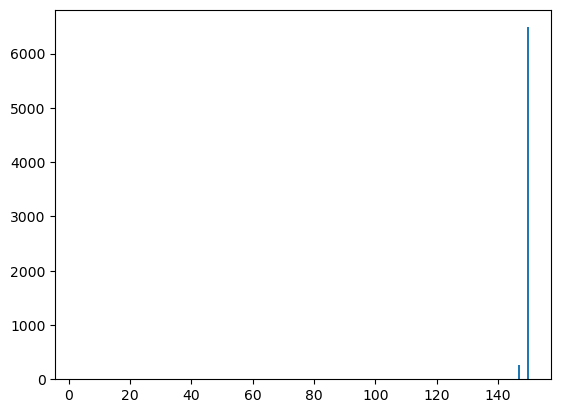

In [22]:
_ = plt.hist(counts,bins=300)

In [27]:
np.unique(counts,return_counts=True)

(array([  3,   6,   9,  12,  15,  18,  21,  24,  27,  33,  36,  39,  42,
         45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,  81,  84,
         87,  90,  93,  96,  99, 102, 105, 108, 111, 114, 117, 120, 123,
        126, 129, 132, 135, 138, 141, 144, 147, 150]),
 array([   1,    3,    4,    3,    7,    7,    2,    4,    6,    2,    3,
           7,    4,    3,    5,    6,    5,    1,    6,    5,    2,    2,
           7,    8,    8,    6,    5,    6,    7,    1,    4,    5,    8,
           5,    7,    1,    4,    4,    5,    5,    5,    4,    7,    2,
           6,   12,  259, 6484]))

In [23]:
import pandas as pd

In [29]:
for smiles in pd.read_csv('simulation_smiles/intra_molecular_hbond.txt',header=None)._values.flatten():

    ids = lwreg.query(config,smiles=smiles,layers=lwreg.utils.HashLayer.NO_STEREO_SMILES)
    if len(ids) > 0:
        confids = lwreg.query(config,ids=ids)

        for m, confid in confids:
            cn = lwreg.utils._connect(config) # Connection to the database
            curs = cn.cursor() # Command line cursor in postgresql
            curs.execute("update solvent_CCl3.explicit_calculations set usage_flag = 'prospective_simulations' where conf_id='"+str(confid)+"'")
            cn.commit()
            
for smiles in pd.read_csv('simulation_smiles/conformational_ensemble_smiles.txt',header=None)._values.flatten():

    ids = lwreg.query(config,smiles=smiles,layers=lwreg.utils.HashLayer.NO_STEREO_SMILES)
    if len(ids) > 0:
        confids = lwreg.query(config,ids=ids)

        for m, confid in confids:
            cn = lwreg.utils._connect(config) # Connection to the database
            curs = cn.cursor() # Command line cursor in postgresql
            curs.execute("update solvent_CCl3.explicit_calculations set usage_flag = 'prospective_simulations' where conf_id='"+str(confid)+"'")
            cn.commit()

[(346772, 346777), (346772, 346801), (346772, 346827)]


In [ ]:
"insert into solvent_tip3p.explicit_calculations (conf_id, positions, forces, atomfeatures, trajectory, origin, usage_flag) values (%s, %s, %s, %s, %s, %s, %s)", (entry_molregno_confid[1], arr_to_string(pos[k]),arr_to_string(force[k]),arr_to_string(atfeat), None, entry_file, usage_flag)

In [52]:
confid = 123
print("update solvent_tip3p.explicit_calculations set usage_flag = 'prospective_simulations' where conf_id='"+str(confid)+"'")

update solvent_tip3p.explicit_calculations set usage_flag = 'prospective_simulations' where conf_id='123'


In [69]:
psql_connection_string = f"postgresql://{config['user']}:{config['password']}@{config['host']}/{config['dbname']}"
d = %sql $psql_connection_string \
SELECT origin from solvent_tip3p.explicit_calculations where usage_flag='hydration_free_energy_validation';

90 rows affected.


In [48]:
arr2, counts2

(array([ 90, 264, 267, 270]), array([ 1,  2,  4, 26]))

In [37]:
(3*4+6*2) * 3 * 3

216

In [30]:
264/3

88.0

In [8]:
storage = hdf5_storage(files[0])            

In [9]:
testsmiles = storage.get_smiles('10')

In [10]:
testsmiles

'[H]c1c([H])c(Cl)c2c(c1[H])-n1c(nc3c([H])c([H])c([H])c([H])c3c1=O)C2=O'

In [12]:
if len(lwreg.query(config,smiles=testsmiles,layers=lwreg.utils.HashLayer.NO_STEREO_SMILES)) > 0:
    print(45)

45


In [42]:
lwreg.query(config,ids=[89978])

[(89978, 89979),
 (89978, 90059),
 (89978, 90117),
 (89978, 90090),
 (89978, 90001),
 (89978, 90031),
 (89978, 92497),
 (89978, 92529),
 (89978, 92552)]

In [10]:
psql_connection_string = f"postgresql://{config['user']}:{config['password']}@{config['host']}/{config['dbname']}"

In [11]:
%load_ext sql

In [12]:
d = %sql $psql_connection_string \
SELECT * from solvent_tip3p.explicit_calculations;

536757 rows affected.


In [13]:
d.DataFrame()

,conf_id,positions,forces,atomfeatures,trajectory,origin,usage_flag
0,1,"[[1.60853994, -0.00276800059, 2.53582788], [1....","[[0.0, -3.17533915, 7.44690002, -21.1766397], ...","[[-0.03805263, 0.1504859, 0.15929745, 0.733756...",None,Additional_elements_16.h5,train
1,2,"[[0.33521423, 1.93776524, 0.65952581], [0.2874...","[[0.0, 477.74500544, -679.77343009, 462.893115...","[[-0.59818696, 0.1304859, 0.13845063, 0.867814...",None,Additional_elements_56.h5,train
2,3,"[[2.32759953, 2.05878758, 2.6759553], [2.33782...","[[0.0, -116.287229, 444.574806, 31.7631949], [...","[[-0.4794455, 0.1354859, 0.09939232, 0.503364,...",None,Additional_elements_80.h5,train
3,6,"[[0.3955453, 0.49953544, 1.91551507], [0.46098...","[[0.0, 128.16029339, 43.17951318, 60.96634311]...","[[-0.18906667, 0.1604859, -0.11289686, 0.86781...",None,Additional_elements_24.h5,train
4,3286,"[[0.13792783, 2.14761448, 1.13500428], [0.2495...","[[0.0, 4.53358489, -104.82649885, 39.11994759]...","[[-0.204, 0.1604859, -0.11289686, 0.867814, 0....",None,Additional_elements_1.h5,train
...,...,...,...,...,...,...,...
536752,536855,"[[1.24780488, 2.48937988, 3.1832664], [1.18103...","[[0.0, 95.867093, -193.739976, -213.997889], [...","[[0.4192, 0.1504859, 0.15929745, 0.733756, 0.5...",None,Additional_elements_5879.h5,train
536753,536857,"[[0.85108656, 3.35780501, 2.88350081], [0.9697...","[[0.0, -150.315673, 157.741744, -135.907614], ...","[[0.4192, 0.1504859, 0.15929745, 0.733756, 0.5...",None,Additional_elements_5879.h5,train
536754,536859,"[[2.62347865, 0.56198275, 1.43341196], [2.7308...","[[0.0, -35.8997637, -105.957359, 18.169783], [...","[[-0.34462273, 0.1504859, 0.15929745, 0.733756...",None,Additional_elements_5879.h5,train
536755,536861,"[[2.35966825, 1.07118928, 0.43247464], [2.4427...","[[0.0, 87.8305358, 44.2719894, -9.7248125], [0...","[[-0.34462273, 0.1504859, 0.15929745, 0.733756...",None,Additional_elements_5879.h5,train
